In [1]:
import os
import numpy as np
import pandas as pd
import time

In [2]:
root_dir = "/nrcan_p2"
data_dir = os.path.join(root_dir,"data")
geoscan_files_dir = os.path.join(data_dir,"01_raw","20201006","geoscan")
metadata_path = os.path.join(geoscan_files_dir, 'GEOSCAN-extract-20200211144755.xml_processed.parquet')

In [3]:
# Questions
# to do stemming if searching through full text? A: no need to stem for now 
# does keyword need to be found separately or can it be part of another word?
# TODO
# make total word counter based on SET of words for each article

In [4]:
df = pd.read_parquet(metadata_path)

In [5]:
df.head(5)

,{http://purl.org/dc/elements/1.1/}contributor,{http://purl.org/dc/elements/1.1/}title_en,{http://purl.org/dc/elements/1.1/}creator,{http://purl.org/dc/elements/1.1/}subject_en,{http://purl.org/dc/elements/1.1/}subject_fr,{http://purl.org/dc/elements/1.1/}source_en,{http://purl.org/dc/elements/1.1/}source_fr,{http://purl.org/dc/elements/1.1/}description_en,{http://purl.org/dc/elements/1.1/}description_fr,{http://purl.org/dc/elements/1.1/}date,...,title_fr_en,title_no_en,title_merged,desc_en,desc_fr,desc_en_lang,desc_en_en,desc_fr_lang,subject_g200,subject_ns200
0,[GEOSCAN],"[Voggite, a new hydrated Na-Zr hydroxide-phosp...","[Roberts, A C, Sabina, A P, Ercit, T S, Grice,...","[phosphates, carbonates, minerals, optical pro...","[minéraux de phosphates, carbonates, minéraux,...","[Canadian Mineralogist vol. 28, no. 1, p. 155...","[Canadian Mineralogist vol. 28, no. 1, p. 155...",[None],[None],[1990],...,None,None,"Voggite, a new hydrated Na-Zr hydroxide-phosph...",None,None,None,None,None,"[carbonates, intrusive rocks, igneous rocks, m...","[intrusive rocks, igneous rocks, mineralogy]"
1,[GEOSCAN],[The inversion of time-domain airborne electro...,"[Keating, P B, Crossley, D J]","[geophysical surveys, geophysical interpretati...","[levés géophysiques, interprétations géophysiq...","[Geophysics vol. 55, no. 6, p. 705-711; 10.11...","[Geophysics vol. 55, no. 6, p. 705-711; 10.11...",[Airborne electromagnetic (EM) methods were de...,[None],[1990],...,None,None,The inversion of time-domain airborne electrom...,Airborne electromagnetic (EM) methods were dev...,None,en,Airborne electromagnetic (EM) methods were dev...,None,"[geophysical surveys, geophysical interpretati...","[geophysical surveys, geophysical interpretati..."
2,[GEOSCAN],"[Lithosphere folds in the Eurekan orogen, Arct...","[Stephenson, R A, Ricketts, B D, Cloetingh, S ...","[tectonophysics, orogenies, structural feature...","[tectonophysique, orogénies, caractéristiques ...","[Geology vol. 18, no. 7, p. 603-606; 10.1130/...","[Geology vol. 18, no. 7, p. 603-606; 10.1130/...",[Cornwall and Princess Margaret arches are maj...,[None],[1990],...,None,None,"Lithosphere folds in the Eurekan orogen, Arcti...",Cornwall and Princess Margaret arches are majo...,None,en,Cornwall and Princess Margaret arches are majo...,None,"[orogenies, structural features, folds, anticl...","[structural features, folds, geophysical surve..."
3,[GEOSCAN],None,[Geological Survey of Canada],"[structural analyses, structural interpretatio...","[analyses structurales, interpretations struct...",[Geological Survey of Canada; Géologie de l'Or...,[Commission géologique du Canada; Géologie de ...,[None],[None],[1991],...,[],None,None,None,None,None,None,None,"[structural analyses, structural interpretatio...","[structural interpretations, structural featur..."
4,[GEOSCAN],[Archaean Geology; Dating Old Gold Deposits],"[Thomas, G, Whalley, B J P]","[gold, mineral deposits, radiometric dates, ur...","[or, gisements minéraux, datations radiométriq...","[Nature vol. 346, no. 6287, p. 792-793]","[Nature vol. 346, no. 6287, p. 792-793]",[None],[None],[1990],...,None,None,Archaean Geology; Dating Old Gold Deposits,None,None,None,None,None,"[gold, mineral deposits, radiometric dates, ur...","[gold, mineral deposits, radiometric dates, ur..."


In [6]:
df.columns

Index(['{http://purl.org/dc/elements/1.1/}contributor',
       '{http://purl.org/dc/elements/1.1/}title_en',
       '{http://purl.org/dc/elements/1.1/}creator',
       '{http://purl.org/dc/elements/1.1/}subject_en',
       '{http://purl.org/dc/elements/1.1/}subject_fr',
       '{http://purl.org/dc/elements/1.1/}source_en',
       '{http://purl.org/dc/elements/1.1/}source_fr',
       '{http://purl.org/dc/elements/1.1/}description_en',
       '{http://purl.org/dc/elements/1.1/}description_fr',
       '{http://purl.org/dc/elements/1.1/}date',
       '{http://purl.org/dc/elements/1.1/}type_en',
       '{http://purl.org/dc/elements/1.1/}format',
       '{http://purl.org/dc/elements/1.1/}identifier_geoscanid',
       '{http://purl.org/dc/elements/1.1/}identifier_en',
       '{http://purl.org/dc/elements/1.1/}identifier_fr',
       '{http://purl.org/dc/elements/1.1/}language',
       '{http://purl.org/dc/elements/1.1/}coverage_en',
       '{http://purl.org/dc/elements/1.1/}coverage_fr',
     

In [7]:
df['title_merged'].iloc[1]

'The inversion of time-domain airborne electromagnetic data using the plate model'

In [8]:
df['desc_en_en'].iloc[1]

'Airborne electromagnetic (EM) methods were developed in the early 1950s, mostly by Canadian mining exploration companies as a means of economically carrying out prospecting for sulfide deposits associated with volcanics in resistive shield areas. Present interpretation\ntechniques are based on the use of nomograms but the approach is easily amenable to digital processing. For highly accurate interpretation, however, it is necessary to develop quantitative interpretation techniques that can make full use of all the data available. Inverse theory has been used for\ninterpretation with great success in most geophysical disciplines; however, in airborne EM surveying, inversion has only been used for the interpretation of airborne EM data using half-space and one-layer models. By introducing some approximations to the rectangular thin-plate model, it is now\npossible to apply inverse theory to the interpretation of time-domain EM data. This approach provides estimates of the parameter erro

In [9]:
df['subject_g200'].iloc[1]

array(['geophysical surveys', 'geophysical interpretations', 'anomalies',
       'e m surveys', 'magnetic surveys, airborne', 'mineral deposits',
       'geophysics'], dtype=object)

In [10]:
# Making some changes to the copy for easier dataset analysis
df_2 = df.copy()

In [11]:
df_2['geo_id'] = df_2['{http://purl.org/dc/elements/1.1/}identifier_geoscanid'].apply(lambda x: x[0])

In [12]:
# Each row represents a unique article 
print(len(df_2['geo_id']))
print(df_2['geo_id'].nunique())

92663
92663


In [13]:
# df_2['len_subject_g200'] = df['subject_g200'].apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0)
# df_2['len_subject_ns200'] = df['subject_ns200'].apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0)

In [14]:
def search_string(string, keywords):
    
    """
    Takes list of keywords and searches for them in title or abstract.
    Returns 1 if at least one of the keywords is found. 
    """
    
    if isinstance(string, str) and isinstance(keywords, np.ndarray):
    
        string = string.lower()

        if any(word.lower() in string for word in keywords):
            return 1
        else:
            return 0

    return 0
    

In [15]:
df_2['title_exists'] = df_2['title_merged'].apply(lambda x: 1 if isinstance(x, str) else 0)
df_2['desc_exists'] = df_2['desc_en_en'].apply(lambda x: 1 if isinstance(x, str) else 0)

In [16]:
# 81% of documents have an existing title in metadata
# 21% of documents have existing abstract in metadata
print(df_2[df_2['title_exists'] == 1].shape[0] / df_2.shape[0])
print(df_2[df_2['desc_exists'] == 1].shape[0] / df_2.shape[0])

0.8114673602192892
0.21536103946559038


In [17]:
df_2['subject_g200_in_title'] = df_2.apply(lambda x: search_string(x['title_merged'], x['subject_g200']), axis=1)
df_2['subject_g200_in_desc'] = df_2.apply(lambda x: search_string(x['desc_en_en'], x['subject_g200']), axis=1)

df_2['subject_ns200_in_title'] = df_2.apply(lambda x: search_string(x['title_merged'], x['subject_ns200']), axis=1)
df_2['subject_ns200_in_desc'] = df_2.apply(lambda x: search_string(x['desc_en_en'], x['subject_ns200']), axis=1)

In [18]:
# Ignoring documents that do not have a title 
sum(df_2[df_2['title_exists'] == 1]['subject_ns200_in_title']) / df_2[df_2['title_exists'] == 1].shape[0]

0.16937746864734748

In [19]:
sum(df_2[df_2['desc_exists'] == 1]['subject_ns200_in_desc']) / df_2[df_2['desc_exists'] == 1].shape[0]

0.393816396071357

In [20]:
sum(df_2[df_2['title_exists'] == 1]['subject_g200_in_title']) / df_2[df_2['title_exists'] == 1].shape[0]

0.2277339645977684

In [21]:
sum(df_2[df_2['desc_exists'] == 1]['subject_g200_in_desc']) / df_2[df_2['desc_exists'] == 1].shape[0]

0.49338544798556827

In [373]:
def split_keywords(keywords):
    
    if isinstance(keywords, np.ndarray):
        
        new_arr = []
        seen = set()
        
        # List of words to ignore 
        # The word 'and' was the most frequent word found in the title and keywords 
        stopwords = ['and']
        # TODO: check for '/' in words like geology/geomorphology' ??
        for word in keywords:
            word = word.split()
            for w in word:
                # Does not include individual characters as a word or sub-words already added to list
                if len(w) > 1 and w not in seen and w not in stopwords:
                    new_arr.append(w.lower())
                seen.add(w.lower())
            
        return np.array(new_arr)
            
    return keywords
    

In [377]:
df_2['subject_g200_split'] = df_2.apply(lambda x: split_keywords(x['subject_g200']), axis=1)
df_2['subject_ns200_split'] = df_2.apply(lambda x: split_keywords(x['subject_ns200']), axis=1)

In [378]:
df_2['subject_g200_split_in_title'] = df_2.apply(lambda x: search_string(x['title_merged'], x['subject_g200_split']), axis=1)
df_2['subject_g200_split_in_desc'] = df_2.apply(lambda x: search_string(x['desc_en_en'], x['subject_g200_split']), axis=1)

df_2['subject_ns200_split_in_title'] = df_2.apply(lambda x: search_string(x['title_merged'], x['subject_ns200_split']), axis=1)
df_2['subject_ns200_split_in_desc'] = df_2.apply(lambda x: search_string(x['desc_en_en'], x['subject_ns200_split']), axis=1)

In [379]:
df_2['len_subject_g200_split'] = df['subject_g200'].apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0)
df_2['len_subject_ns200_split'] = df['subject_ns200'].apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0)

### Percentages for split words in articles with existing titles/abstracts

In [380]:
# sum(df_2['subject_ns200_split_in_title']) / df_2['subject_ns200_split_in_title'].shape[0]
# sum(df_2[df_2['title_exists'] == 1]['subject_ns200_split_in_title']) / df_2[df_2['title_exists'] == 1].shape[0]
sum(df_2[(df_2['title_exists'] == 1) & (df_2['len_subject_ns200_split'] > 0)]['subject_ns200_split_in_title']) / df_2[(df_2['title_exists'] == 1) & (df_2['len_subject_ns200_split'] > 0)].shape[0]

0.38340071949317117

In [381]:
# sum(df_2['subject_ns200_split_in_desc']) / df_2['subject_ns200_split_in_desc'].shape[0]
sum(df_2[(df_2['desc_exists'] == 1) & (df_2['len_subject_ns200_split'] > 0)]['subject_ns200_split_in_desc']) / df_2[(df_2['desc_exists'] == 1) & (df_2['len_subject_ns200_split'] > 0)].shape[0]

0.7429715840386941

In [382]:
# sum(df_2['subject_g200_split_in_title']) / df_2['subject_g200_split_in_title'].shape[0]
sum(df_2[(df_2['title_exists'] == 1) & (df_2['len_subject_g200_split'] > 0)]['subject_g200_split_in_title']) / df_2[(df_2['title_exists'] == 1) & (df_2['len_subject_g200_split'] > 0)].shape[0]

0.4910235631467398

In [383]:
# sum(df_2['subject_g200_split_in_desc']) / df_2['subject_g200_split_in_desc'].shape[0]
sum(df_2[(df_2['desc_exists'] == 1) & (df_2['len_subject_g200_split'] > 0)]['subject_g200_split_in_desc']) / df_2[(df_2['desc_exists'] == 1) & (df_2['len_subject_g200_split'] > 0)].shape[0]

0.8362643596652957

In [384]:
# Rows where splitting the subjects finds word in title 
df_split = df_2[(df_2['subject_ns200_split_in_title'] - df_2['subject_ns200_in_title']) == 1][['title_merged', 'subject_ns200', 'subject_ns200_split']]

In [385]:
df_split.iloc[0]['title_merged']

'The inversion of time-domain airborne electromagnetic data using the plate model'

In [386]:
df_split.iloc[0].iloc[1]

array(['geophysical surveys', 'geophysical interpretations',
       'e m surveys', 'magnetic surveys, airborne', 'mineral deposits',
       'geophysics'], dtype=object)

In [387]:
df_split.iloc[0].iloc[2]

array(['geophysical', 'surveys', 'interpretations', 'magnetic',
       'surveys,', 'airborne', 'mineral', 'deposits', 'geophysics'],
      dtype='<U15')

In [388]:
for word in df_split.iloc[0].iloc[2]:
    
    if word in df_split.iloc[0]['title_merged']:
        print(word)

magnetic
airborne


### Calculating percent of split keywords found in article metadata

In [389]:
def percent_keywords(string, keywords):
    
    """
    Takes list of keywords and searches for them in title or abstract.
    Returns percentage of the keywords is found. 
    """
    
    if isinstance(string, str) and isinstance(keywords, np.ndarray):
        
        
        string = string.lower()
        
        matches = {word.lower() for word in keywords if word in string}
        
        return len(matches) / len(set(keywords))

    return 0    

In [390]:
df_2['subject_g200_split_percent_in_title'] = df_2.apply(lambda x: percent_keywords(x['title_merged'], x['subject_g200_split']), axis=1)
df_2['subject_ns200_split_percent_in_title'] = df_2.apply(lambda x: percent_keywords(x['title_merged'], x['subject_ns200_split']), axis=1)

In [391]:
df_2['subject_g200_split_percent_in_desc'] = df_2.apply(lambda x: percent_keywords(x['desc_en_en'], x['subject_g200_split']), axis=1)
df_2['subject_ns200_split_percent_in_desc'] = df_2.apply(lambda x: percent_keywords(x['desc_en_en'], x['subject_ns200_split']), axis=1)

In [392]:
# TODO: also filter for where keywords exists 
df_2[(df_2['title_exists'] == 1) & (df_2['len_subject_ns200_split'] > 0)]['subject_ns200_split_percent_in_title'].mean()

0.08017378559718616

In [393]:
df_2[(df_2['desc_exists'] == 1) & (df_2['len_subject_ns200_split'] > 0)]['subject_ns200_split_percent_in_desc'].mean()

0.25326086929449104

In [394]:
df_2[(df_2['title_exists'] == 1) & (df_2['len_subject_g200_split'] > 0)]['subject_g200_split_percent_in_title'].mean()

0.09259456589069684

In [395]:
df_2[(df_2['desc_exists'] == 1) & (df_2['len_subject_g200_split'] > 0)]['subject_g200_split_percent_in_desc'].mean()

0.29749312081680457

### Analysis per Keywords

In [396]:
def create_word_set(df, col):
    
    """
    Create set of all subject words found in metadata of all articles. 
    """
    
    word_set = set()
    
    for _, j in df[[col]].iterrows():
        try:
            for word in j.values[0]:
                word_set.add(word.lower())
        except TypeError:
            pass
    
    return word_set

In [397]:
subject_g200_all = create_word_set(df_2, 'subject_g200')

In [398]:
len(subject_g200_all)

596

In [399]:
subject_g200_split_all = create_word_set(df_2, 'subject_g200_split')

In [400]:
len(subject_g200_split_all)

578

#### For each keyword, calculating how many articles have it in the metadata

In [401]:
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

In [402]:
def create_word_counter(df, col):
    
    word_list = []
    
    for _, j in df[[col]].iterrows():
        try:
            for word in set(j.values[0]):
                word_list.append(word.lower())
        except TypeError:
            pass
        
    c = Counter(word_list)
        
    return c
    

In [403]:
subject_g200_counter = create_word_counter(df_2, 'subject_g200_split')

In [404]:
subject_ns200_counter = create_word_counter(df_2, 'subject_ns200_split')

In [405]:
def plot_word_freq(word_counter, max_words):
    
    max_words = min(max_words, len(word_counter))
    
    if isinstance(word_counter, Counter):
    
        word_list = word_counter.most_common()[:max_words]
    
    elif isinstance(word_counter, defaultdict):
        
        word_list = sorted(word_counter.items(), key=lambda x: x[1], reverse=True)[:max_words]
    

    x = [word for word, freq in word_list]
    y = [freq for word, freq in word_list]   
    
    plt.bar(x, y)
    
    if max_words == len(word_counter):
        plt.xticks([])
    else:
        plt.xticks(rotation=90)
    

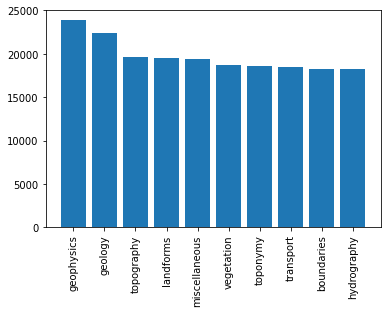

In [406]:
plot_word_freq(subject_g200_counter, 10)

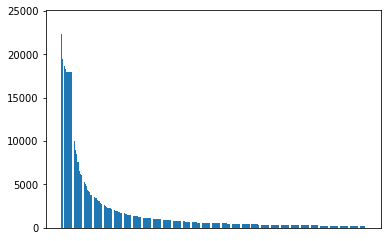

In [407]:
plot_word_freq(subject_g200_counter, len(subject_g200_counter))

#### For each keyword, calculating how many articles have it in the title

In [408]:
def word_counter(df, key_col, str_col):
    
    word_freq = defaultdict(int)
    
    for _, j in df[[str_col, key_col]].iterrows():
        
        try:
            for word in j[key_col]:
                try:
                    if word.lower() in j[str_col].lower():
                        word_freq[word.lower()] += 1
                except:
                    pass
                    
        except TypeError:
            pass
        
    return word_freq
    
    

In [409]:
word_counter_title = word_counter(df_2, 'subject_g200_split', 'title_merged')

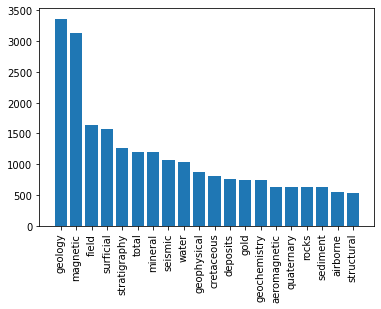

In [410]:
plot_word_freq(word_counter_title, 20)

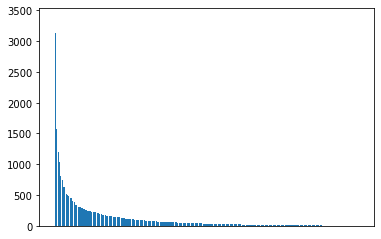

In [411]:
plot_word_freq(word_counter_title, len(word_counter_title))

#### For each keyword, calculating how many articles have it in the abstract

In [412]:
word_counter_abstract = word_counter(df_2, 'subject_g200_split', 'desc_en_en')

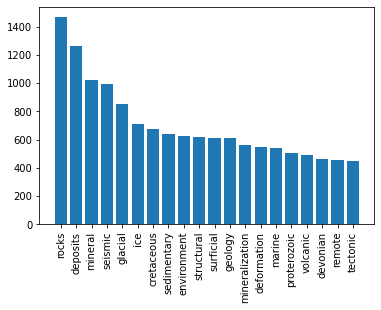

In [413]:
plot_word_freq(word_counter_abstract, 20)

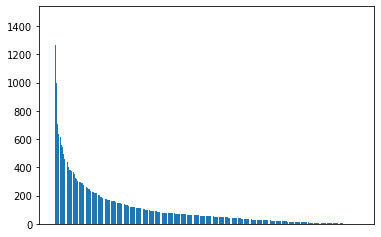

In [414]:
plot_word_freq(word_counter_abstract, len(word_counter_abstract))

## Article similary by keyword intersection

In [60]:
import pickle

In [640]:
def create_matrix_array(df, key_col):
    
    geo_id_col = '{http://purl.org/dc/elements/1.1/}identifier_geoscanid'
    
    # Filtering for documents that have associated keywords in metadata
#     df = df[df[f'len_{key_col}'] > 0][[geo_id_col, key_col]]
    df = df[(df[f'len_{key_col}'] > 0) & (df['title_exists'] == 1) & (df['desc_exists'] == 1)][[geo_id_col, key_col]]
    
    all_ids = set()
    
    for _, j in df[[geo_id_col]].iterrows():
        all_ids.add(int(j[0][0]))
        
    id_index = {geo_id:i for i, geo_id in enumerate(all_ids)} 

    M = np.zeros((df.shape[0], df.shape[0]))
    
    for i in range(df.shape[0]):
        
        print(f'Processing {i}')
        
        row_id = int(df[geo_id_col].iloc[i][0])
        first_set = set(df[key_col].iloc[i])
            
        for _, j in df.iloc[i:].iterrows():
            
            second_set = set(j[key_col])
            col_id = int(j[geo_id_col][0])
            intersection = len(first_set.intersection(second_set))
            
            M[id_index[row_id]][id_index[col_id]] = intersection

    M = M + M.T
    
    np.fill_diagonal(M, 0)

    return M, id_index

In [641]:
# the strings in 'subject_g200_split are assumed to be all lowercase
M, id_index = create_matrix_array(df_2, 'subject_g200_split')

Processing 0
Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
Processing 12
Processing 13
Processing 14
Processing 15
Processing 16
Processing 17
Processing 18
Processing 19
Processing 20
Processing 21
Processing 22
Processing 23
Processing 24
Processing 25
Processing 26
Processing 27
Processing 28
Processing 29
Processing 30
Processing 31
Processing 32
Processing 33
Processing 34
Processing 35
Processing 36
Processing 37
Processing 38
Processing 39
Processing 40
Processing 41
Processing 42
Processing 43
Processing 44
Processing 45
Processing 46
Processing 47
Processing 48
Processing 49
Processing 50
Processing 51
Processing 52
Processing 53
Processing 54
Processing 55
Processing 56
Processing 57
Processing 58
Processing 59
Processing 60
Processing 61
Processing 62
Processing 63
Processing 64
Processing 65
Processing 66
Processing 67
Processing 68
Processing 69
Processing 70
Processing 71
Pr

Processing 554
Processing 555
Processing 556
Processing 557
Processing 558
Processing 559
Processing 560
Processing 561
Processing 562
Processing 563
Processing 564
Processing 565
Processing 566
Processing 567
Processing 568
Processing 569
Processing 570
Processing 571
Processing 572
Processing 573
Processing 574
Processing 575
Processing 576
Processing 577
Processing 578
Processing 579
Processing 580
Processing 581
Processing 582
Processing 583
Processing 584
Processing 585
Processing 586
Processing 587
Processing 588
Processing 589
Processing 590
Processing 591
Processing 592
Processing 593
Processing 594
Processing 595
Processing 596
Processing 597
Processing 598
Processing 599
Processing 600
Processing 601
Processing 602
Processing 603
Processing 604
Processing 605
Processing 606
Processing 607
Processing 608
Processing 609
Processing 610
Processing 611
Processing 612
Processing 613
Processing 614
Processing 615
Processing 616
Processing 617
Processing 618
Processing 619
Processing

Processing 1094
Processing 1095
Processing 1096
Processing 1097
Processing 1098
Processing 1099
Processing 1100
Processing 1101
Processing 1102
Processing 1103
Processing 1104
Processing 1105
Processing 1106
Processing 1107
Processing 1108
Processing 1109
Processing 1110
Processing 1111
Processing 1112
Processing 1113
Processing 1114
Processing 1115
Processing 1116
Processing 1117
Processing 1118
Processing 1119
Processing 1120
Processing 1121
Processing 1122
Processing 1123
Processing 1124
Processing 1125
Processing 1126
Processing 1127
Processing 1128
Processing 1129
Processing 1130
Processing 1131
Processing 1132
Processing 1133
Processing 1134
Processing 1135
Processing 1136
Processing 1137
Processing 1138
Processing 1139
Processing 1140
Processing 1141
Processing 1142
Processing 1143
Processing 1144
Processing 1145
Processing 1146
Processing 1147
Processing 1148
Processing 1149
Processing 1150
Processing 1151
Processing 1152
Processing 1153
Processing 1154
Processing 1155
Processi

Processing 1689
Processing 1690
Processing 1691
Processing 1692
Processing 1693
Processing 1694
Processing 1695
Processing 1696
Processing 1697
Processing 1698
Processing 1699
Processing 1700
Processing 1701
Processing 1702
Processing 1703
Processing 1704
Processing 1705
Processing 1706
Processing 1707
Processing 1708
Processing 1709
Processing 1710
Processing 1711
Processing 1712
Processing 1713
Processing 1714
Processing 1715
Processing 1716
Processing 1717
Processing 1718
Processing 1719
Processing 1720
Processing 1721
Processing 1722
Processing 1723
Processing 1724
Processing 1725
Processing 1726
Processing 1727
Processing 1728
Processing 1729
Processing 1730
Processing 1731
Processing 1732
Processing 1733
Processing 1734
Processing 1735
Processing 1736
Processing 1737
Processing 1738
Processing 1739
Processing 1740
Processing 1741
Processing 1742
Processing 1743
Processing 1744
Processing 1745
Processing 1746
Processing 1747
Processing 1748
Processing 1749
Processing 1750
Processi

Processing 2202
Processing 2203
Processing 2204
Processing 2205
Processing 2206
Processing 2207
Processing 2208
Processing 2209
Processing 2210
Processing 2211
Processing 2212
Processing 2213
Processing 2214
Processing 2215
Processing 2216
Processing 2217
Processing 2218
Processing 2219
Processing 2220
Processing 2221
Processing 2222
Processing 2223
Processing 2224
Processing 2225
Processing 2226
Processing 2227
Processing 2228
Processing 2229
Processing 2230
Processing 2231
Processing 2232
Processing 2233
Processing 2234
Processing 2235
Processing 2236
Processing 2237
Processing 2238
Processing 2239
Processing 2240
Processing 2241
Processing 2242
Processing 2243
Processing 2244
Processing 2245
Processing 2246
Processing 2247
Processing 2248
Processing 2249
Processing 2250
Processing 2251
Processing 2252
Processing 2253
Processing 2254
Processing 2255
Processing 2256
Processing 2257
Processing 2258
Processing 2259
Processing 2260
Processing 2261
Processing 2262
Processing 2263
Processi

Processing 2715
Processing 2716
Processing 2717
Processing 2718
Processing 2719
Processing 2720
Processing 2721
Processing 2722
Processing 2723
Processing 2724
Processing 2725
Processing 2726
Processing 2727
Processing 2728
Processing 2729
Processing 2730
Processing 2731
Processing 2732
Processing 2733
Processing 2734
Processing 2735
Processing 2736
Processing 2737
Processing 2738
Processing 2739
Processing 2740
Processing 2741
Processing 2742
Processing 2743
Processing 2744
Processing 2745
Processing 2746
Processing 2747
Processing 2748
Processing 2749
Processing 2750
Processing 2751
Processing 2752
Processing 2753
Processing 2754
Processing 2755
Processing 2756
Processing 2757
Processing 2758
Processing 2759
Processing 2760
Processing 2761
Processing 2762
Processing 2763
Processing 2764
Processing 2765
Processing 2766
Processing 2767
Processing 2768
Processing 2769
Processing 2770
Processing 2771
Processing 2772
Processing 2773
Processing 2774
Processing 2775
Processing 2776
Processi

Processing 3228
Processing 3229
Processing 3230
Processing 3231
Processing 3232
Processing 3233
Processing 3234
Processing 3235
Processing 3236
Processing 3237
Processing 3238
Processing 3239
Processing 3240
Processing 3241
Processing 3242
Processing 3243
Processing 3244
Processing 3245
Processing 3246
Processing 3247
Processing 3248
Processing 3249
Processing 3250
Processing 3251
Processing 3252
Processing 3253
Processing 3254
Processing 3255
Processing 3256
Processing 3257
Processing 3258
Processing 3259
Processing 3260
Processing 3261
Processing 3262
Processing 3263
Processing 3264
Processing 3265
Processing 3266
Processing 3267
Processing 3268
Processing 3269
Processing 3270
Processing 3271
Processing 3272
Processing 3273
Processing 3274
Processing 3275
Processing 3276
Processing 3277
Processing 3278
Processing 3279
Processing 3280
Processing 3281
Processing 3282
Processing 3283
Processing 3284
Processing 3285
Processing 3286
Processing 3287
Processing 3288
Processing 3289
Processi

Processing 3741
Processing 3742
Processing 3743
Processing 3744
Processing 3745
Processing 3746
Processing 3747
Processing 3748
Processing 3749
Processing 3750
Processing 3751
Processing 3752
Processing 3753
Processing 3754
Processing 3755
Processing 3756
Processing 3757
Processing 3758
Processing 3759
Processing 3760
Processing 3761
Processing 3762
Processing 3763
Processing 3764
Processing 3765
Processing 3766
Processing 3767
Processing 3768
Processing 3769
Processing 3770
Processing 3771
Processing 3772
Processing 3773
Processing 3774
Processing 3775
Processing 3776
Processing 3777
Processing 3778
Processing 3779
Processing 3780
Processing 3781
Processing 3782
Processing 3783
Processing 3784
Processing 3785
Processing 3786
Processing 3787
Processing 3788
Processing 3789
Processing 3790
Processing 3791
Processing 3792
Processing 3793
Processing 3794
Processing 3795
Processing 3796
Processing 3797
Processing 3798
Processing 3799
Processing 3800
Processing 3801
Processing 3802
Processi

Processing 4254
Processing 4255
Processing 4256
Processing 4257
Processing 4258
Processing 4259
Processing 4260
Processing 4261
Processing 4262
Processing 4263
Processing 4264
Processing 4265
Processing 4266
Processing 4267
Processing 4268
Processing 4269
Processing 4270
Processing 4271
Processing 4272
Processing 4273
Processing 4274
Processing 4275
Processing 4276
Processing 4277
Processing 4278
Processing 4279
Processing 4280
Processing 4281
Processing 4282
Processing 4283
Processing 4284
Processing 4285
Processing 4286
Processing 4287
Processing 4288
Processing 4289
Processing 4290
Processing 4291
Processing 4292
Processing 4293
Processing 4294
Processing 4295
Processing 4296
Processing 4297
Processing 4298
Processing 4299
Processing 4300
Processing 4301
Processing 4302
Processing 4303
Processing 4304
Processing 4305
Processing 4306
Processing 4307
Processing 4308
Processing 4309
Processing 4310
Processing 4311
Processing 4312
Processing 4313
Processing 4314
Processing 4315
Processi

Processing 4895
Processing 4896
Processing 4897
Processing 4898
Processing 4899
Processing 4900
Processing 4901
Processing 4902
Processing 4903
Processing 4904
Processing 4905
Processing 4906
Processing 4907
Processing 4908
Processing 4909
Processing 4910
Processing 4911
Processing 4912
Processing 4913
Processing 4914
Processing 4915
Processing 4916
Processing 4917
Processing 4918
Processing 4919
Processing 4920
Processing 4921
Processing 4922
Processing 4923
Processing 4924
Processing 4925
Processing 4926
Processing 4927
Processing 4928
Processing 4929
Processing 4930
Processing 4931
Processing 4932
Processing 4933
Processing 4934
Processing 4935
Processing 4936
Processing 4937
Processing 4938
Processing 4939
Processing 4940
Processing 4941
Processing 4942
Processing 4943
Processing 4944
Processing 4945
Processing 4946
Processing 4947
Processing 4948
Processing 4949
Processing 4950
Processing 4951
Processing 4952
Processing 4953
Processing 4954
Processing 4955
Processing 4956
Processi

Processing 5408
Processing 5409
Processing 5410
Processing 5411
Processing 5412
Processing 5413
Processing 5414
Processing 5415
Processing 5416
Processing 5417
Processing 5418
Processing 5419
Processing 5420
Processing 5421
Processing 5422
Processing 5423
Processing 5424
Processing 5425
Processing 5426
Processing 5427
Processing 5428
Processing 5429
Processing 5430
Processing 5431
Processing 5432
Processing 5433
Processing 5434
Processing 5435
Processing 5436
Processing 5437
Processing 5438
Processing 5439
Processing 5440
Processing 5441
Processing 5442
Processing 5443
Processing 5444
Processing 5445
Processing 5446
Processing 5447
Processing 5448
Processing 5449
Processing 5450
Processing 5451
Processing 5452
Processing 5453
Processing 5454
Processing 5455
Processing 5456
Processing 5457
Processing 5458
Processing 5459
Processing 5460
Processing 5461
Processing 5462
Processing 5463
Processing 5464
Processing 5465
Processing 5466
Processing 5467
Processing 5468
Processing 5469
Processi

Processing 5921
Processing 5922
Processing 5923
Processing 5924
Processing 5925
Processing 5926
Processing 5927
Processing 5928
Processing 5929
Processing 5930
Processing 5931
Processing 5932
Processing 5933
Processing 5934
Processing 5935
Processing 5936
Processing 5937
Processing 5938
Processing 5939
Processing 5940
Processing 5941
Processing 5942
Processing 5943
Processing 5944
Processing 5945
Processing 5946
Processing 5947
Processing 5948
Processing 5949
Processing 5950
Processing 5951
Processing 5952
Processing 5953
Processing 5954
Processing 5955
Processing 5956
Processing 5957
Processing 5958
Processing 5959
Processing 5960
Processing 5961
Processing 5962
Processing 5963
Processing 5964
Processing 5965
Processing 5966
Processing 5967
Processing 5968
Processing 5969
Processing 5970
Processing 5971
Processing 5972
Processing 5973
Processing 5974
Processing 5975
Processing 5976
Processing 5977
Processing 5978
Processing 5979
Processing 5980
Processing 5981
Processing 5982
Processi

Processing 6434
Processing 6435
Processing 6436
Processing 6437
Processing 6438
Processing 6439
Processing 6440
Processing 6441
Processing 6442
Processing 6443
Processing 6444
Processing 6445
Processing 6446
Processing 6447
Processing 6448
Processing 6449
Processing 6450
Processing 6451
Processing 6452
Processing 6453
Processing 6454
Processing 6455
Processing 6456
Processing 6457
Processing 6458
Processing 6459
Processing 6460
Processing 6461
Processing 6462
Processing 6463
Processing 6464
Processing 6465
Processing 6466
Processing 6467
Processing 6468
Processing 6469
Processing 6470
Processing 6471
Processing 6472
Processing 6473
Processing 6474
Processing 6475
Processing 6476
Processing 6477
Processing 6478
Processing 6479
Processing 6480
Processing 6481
Processing 6482
Processing 6483
Processing 6484
Processing 6485
Processing 6486
Processing 6487
Processing 6488
Processing 6489
Processing 6490
Processing 6491
Processing 6492
Processing 6493
Processing 6494
Processing 6495
Processi

Processing 6947
Processing 6948
Processing 6949
Processing 6950
Processing 6951
Processing 6952
Processing 6953
Processing 6954
Processing 6955
Processing 6956
Processing 6957
Processing 6958
Processing 6959
Processing 6960
Processing 6961
Processing 6962
Processing 6963
Processing 6964
Processing 6965
Processing 6966
Processing 6967
Processing 6968
Processing 6969
Processing 6970
Processing 6971
Processing 6972
Processing 6973
Processing 6974
Processing 6975
Processing 6976
Processing 6977
Processing 6978
Processing 6979
Processing 6980
Processing 6981
Processing 6982
Processing 6983
Processing 6984
Processing 6985
Processing 6986
Processing 6987
Processing 6988
Processing 6989
Processing 6990
Processing 6991
Processing 6992
Processing 6993
Processing 6994
Processing 6995
Processing 6996
Processing 6997
Processing 6998
Processing 6999
Processing 7000
Processing 7001
Processing 7002
Processing 7003
Processing 7004
Processing 7005
Processing 7006
Processing 7007
Processing 7008
Processi

Processing 7460
Processing 7461
Processing 7462
Processing 7463
Processing 7464
Processing 7465
Processing 7466
Processing 7467
Processing 7468
Processing 7469
Processing 7470
Processing 7471
Processing 7472
Processing 7473
Processing 7474
Processing 7475
Processing 7476
Processing 7477
Processing 7478
Processing 7479
Processing 7480
Processing 7481
Processing 7482
Processing 7483
Processing 7484
Processing 7485
Processing 7486
Processing 7487
Processing 7488
Processing 7489
Processing 7490
Processing 7491
Processing 7492
Processing 7493
Processing 7494
Processing 7495
Processing 7496
Processing 7497
Processing 7498
Processing 7499
Processing 7500
Processing 7501
Processing 7502
Processing 7503
Processing 7504
Processing 7505
Processing 7506
Processing 7507
Processing 7508
Processing 7509
Processing 7510
Processing 7511
Processing 7512
Processing 7513
Processing 7514
Processing 7515
Processing 7516
Processing 7517
Processing 7518
Processing 7519
Processing 7520
Processing 7521
Processi

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [642]:
np.save('matrix_lowercase.npy', M)

In [1413]:
f = open('geoscan_id.pkl', 'wb')
pickle.dump(id_index, f)
f.close()

In [80]:
M = np.load('matrix.npy')

In [125]:
infile = open('geoscan_id.pkl', 'rb')
id_index = pickle.load(infile)
infile.close()

In [643]:
M.shape

(13415, 13415)

In [644]:
M.mean()

1.061602311262822

In [89]:
non_zero = M[M > 0]

In [96]:
non_zero.mean()

2.361923027266897

In [97]:
tril = np.tril(M, -1)

In [102]:
tril[tril > 0]

42716815

In [117]:
# 47% of connections have at least 1 keyword
len(tril[tril > 0]) / ((M.size - M.shape[0]) / 2)

0.4747662960371897

## Find top articles covering selected keywords

In [645]:
def return_topk(matrix, id_index, df, geo_id, k):
    
    
    try:
        row_id = id_index[int(geo_id)]
    except KeyError:
        print("Geoscan ID provided is not in set of articles for this function.")
        return None
        
    row_slice = M[row_id]
    
    indices = np.nonzero(row_slice)[0]
    values = row_slice[row_slice > 0]
    
    assert indices.shape[0] == values.shape[0]
    
    geo_ids = [geoid for geoid, index in id_index.items() if index in indices]

    value_dict = {geo_ids[i]: values[i] for i in range(len(values))} 

    df['geo_id'] = df['geo_id'].astype(int)
    
    # Extract keywords of target articles
    target_keywords = set(df[df['geo_id'] == int(geo_id)]['subject_g200_split'].values[0])

    # Dataframe with articles that have intersecting keywords with input article   
    df_slice = df[df['geo_id'].isin(geo_ids)].copy()
    
    # Add column for intersection size 
    df_slice['intersection_size'] = df_slice['geo_id'].apply(lambda x: value_dict[x])

    # Sort by size of intersection 
    df_slice.sort_values('intersection_size', ascending=False, inplace=True)
    
    matching_keywords = set()
    matching_geo_ids = []
    
    for _, j in df_slice[['geo_id', 'subject_g200_split','intersection_size']].iterrows():
#         if len(matching_keywords) < len(target_keywords) or len(matching_geo_ids) < k:        
        if k > 0:
            current_keywords = set(j['subject_g200_split'])
            matching_keywords.update(target_keywords.intersection(current_keywords))
            matching_geo_ids.append(j['geo_id'])
            k -= 1
        else:
            break

#     print(len(target_keywords))
#     print(len(matching_keywords))
#     print(len(matching_geo_ids))

#     return df_slice[df_slice['geo_id'].isin(matching_geo_ids)]

    return len(matching_keywords) / len(target_keywords)

    
    
    
    
    
    
    

In [646]:
# df_slice = return_topk(M, id_index, df_2, 294931, 10)295455
percent_match_in_k = return_topk(M, id_index, df_2, 295455, 10)

In [647]:
percent_match_in_k

0.9615384615384616

In [648]:
returns = []
for i, _id in enumerate(list(id_index.keys())):
    print(f'Processing {i}')
    returns.append(return_topk(M, id_index, df_2, _id, 10))

Processing 0
Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
Processing 12
Processing 13
Processing 14
Processing 15
Processing 16
Processing 17
Processing 18
Processing 19
Processing 20
Processing 21
Processing 22
Processing 23
Processing 24
Processing 25
Processing 26
Processing 27
Processing 28
Processing 29
Processing 30
Processing 31
Processing 32
Processing 33
Processing 34
Processing 35
Processing 36
Processing 37
Processing 38
Processing 39
Processing 40
Processing 41
Processing 42
Processing 43
Processing 44
Processing 45
Processing 46
Processing 47
Processing 48
Processing 49
Processing 50
Processing 51
Processing 52
Processing 53
Processing 54
Processing 55
Processing 56
Processing 57
Processing 58
Processing 59
Processing 60
Processing 61
Processing 62
Processing 63
Processing 64
Processing 65
Processing 66
Processing 67
Processing 68
Processing 69
Processing 70
Processing 71
Pr

Processing 556
Processing 557
Processing 558
Processing 559
Processing 560
Processing 561
Processing 562
Processing 563
Processing 564
Processing 565
Processing 566
Processing 567
Processing 568
Processing 569
Processing 570
Processing 571
Processing 572
Processing 573
Processing 574
Processing 575
Processing 576
Processing 577
Processing 578
Processing 579
Processing 580
Processing 581
Processing 582
Processing 583
Processing 584
Processing 585
Processing 586
Processing 587
Processing 588
Processing 589
Processing 590
Processing 591
Processing 592
Processing 593
Processing 594
Processing 595
Processing 596
Processing 597
Processing 598
Processing 599
Processing 600
Processing 601
Processing 602
Processing 603
Processing 604
Processing 605
Processing 606
Processing 607
Processing 608
Processing 609
Processing 610
Processing 611
Processing 612
Processing 613
Processing 614
Processing 615
Processing 616
Processing 617
Processing 618
Processing 619
Processing 620
Processing 621
Processing

Processing 1096
Processing 1097
Processing 1098
Processing 1099
Processing 1100
Processing 1101
Processing 1102
Processing 1103
Processing 1104
Processing 1105
Processing 1106
Processing 1107
Processing 1108
Processing 1109
Processing 1110
Processing 1111
Processing 1112
Processing 1113
Processing 1114
Processing 1115
Processing 1116
Processing 1117
Processing 1118
Processing 1119
Processing 1120
Processing 1121
Processing 1122
Processing 1123
Processing 1124
Processing 1125
Processing 1126
Processing 1127
Processing 1128
Processing 1129
Processing 1130
Processing 1131
Processing 1132
Processing 1133
Processing 1134
Processing 1135
Processing 1136
Processing 1137
Processing 1138
Processing 1139
Processing 1140
Processing 1141
Processing 1142
Processing 1143
Processing 1144
Processing 1145
Processing 1146
Processing 1147
Processing 1148
Processing 1149
Processing 1150
Processing 1151
Processing 1152
Processing 1153
Processing 1154
Processing 1155
Processing 1156
Processing 1157
Processi

Processing 1609
Processing 1610
Processing 1611
Processing 1612
Processing 1613
Processing 1614
Processing 1615
Processing 1616
Processing 1617
Processing 1618
Processing 1619
Processing 1620
Processing 1621
Processing 1622
Processing 1623
Processing 1624
Processing 1625
Processing 1626
Processing 1627
Processing 1628
Processing 1629
Processing 1630
Processing 1631
Processing 1632
Processing 1633
Processing 1634
Processing 1635
Processing 1636
Processing 1637
Processing 1638
Processing 1639
Processing 1640
Processing 1641
Processing 1642
Processing 1643
Processing 1644
Processing 1645
Processing 1646
Processing 1647
Processing 1648
Processing 1649
Processing 1650
Processing 1651
Processing 1652
Processing 1653
Processing 1654
Processing 1655
Processing 1656
Processing 1657
Processing 1658
Processing 1659
Processing 1660
Processing 1661
Processing 1662
Processing 1663
Processing 1664
Processing 1665
Processing 1666
Processing 1667
Processing 1668
Processing 1669
Processing 1670
Processi

Processing 2122
Processing 2123
Processing 2124
Processing 2125
Processing 2126
Processing 2127
Processing 2128
Processing 2129
Processing 2130
Processing 2131
Processing 2132
Processing 2133
Processing 2134
Processing 2135
Processing 2136
Processing 2137
Processing 2138
Processing 2139
Processing 2140
Processing 2141
Processing 2142
Processing 2143
Processing 2144
Processing 2145
Processing 2146
Processing 2147
Processing 2148
Processing 2149
Processing 2150
Processing 2151
Processing 2152
Processing 2153
Processing 2154
Processing 2155
Processing 2156
Processing 2157
Processing 2158
Processing 2159
Processing 2160
Processing 2161
Processing 2162
Processing 2163
Processing 2164
Processing 2165
Processing 2166
Processing 2167
Processing 2168
Processing 2169
Processing 2170
Processing 2171
Processing 2172
Processing 2173
Processing 2174
Processing 2175
Processing 2176
Processing 2177
Processing 2178
Processing 2179
Processing 2180
Processing 2181
Processing 2182
Processing 2183
Processi

Processing 2635
Processing 2636
Processing 2637
Processing 2638
Processing 2639
Processing 2640
Processing 2641
Processing 2642
Processing 2643
Processing 2644
Processing 2645
Processing 2646
Processing 2647
Processing 2648
Processing 2649
Processing 2650
Processing 2651
Processing 2652
Processing 2653
Processing 2654
Processing 2655
Processing 2656
Processing 2657
Processing 2658
Processing 2659
Processing 2660
Processing 2661
Processing 2662
Processing 2663
Processing 2664
Processing 2665
Processing 2666
Processing 2667
Processing 2668
Processing 2669
Processing 2670
Processing 2671
Processing 2672
Processing 2673
Processing 2674
Processing 2675
Processing 2676
Processing 2677
Processing 2678
Processing 2679
Processing 2680
Processing 2681
Processing 2682
Processing 2683
Processing 2684
Processing 2685
Processing 2686
Processing 2687
Processing 2688
Processing 2689
Processing 2690
Processing 2691
Processing 2692
Processing 2693
Processing 2694
Processing 2695
Processing 2696
Processi

Processing 3150
Processing 3151
Processing 3152
Processing 3153
Processing 3154
Processing 3155
Processing 3156
Processing 3157
Processing 3158
Processing 3159
Processing 3160
Processing 3161
Processing 3162
Processing 3163
Processing 3164
Processing 3165
Processing 3166
Processing 3167
Processing 3168
Processing 3169
Processing 3170
Processing 3171
Processing 3172
Processing 3173
Processing 3174
Processing 3175
Processing 3176
Processing 3177
Processing 3178
Processing 3179
Processing 3180
Processing 3181
Processing 3182
Processing 3183
Processing 3184
Processing 3185
Processing 3186
Processing 3187
Processing 3188
Processing 3189
Processing 3190
Processing 3191
Processing 3192
Processing 3193
Processing 3194
Processing 3195
Processing 3196
Processing 3197
Processing 3198
Processing 3199
Processing 3200
Processing 3201
Processing 3202
Processing 3203
Processing 3204
Processing 3205
Processing 3206
Processing 3207
Processing 3208
Processing 3209
Processing 3210
Processing 3211
Processi

Processing 3663
Processing 3664
Processing 3665
Processing 3666
Processing 3667
Processing 3668
Processing 3669
Processing 3670
Processing 3671
Processing 3672
Processing 3673
Processing 3674
Processing 3675
Processing 3676
Processing 3677
Processing 3678
Processing 3679
Processing 3680
Processing 3681
Processing 3682
Processing 3683
Processing 3684
Processing 3685
Processing 3686
Processing 3687
Processing 3688
Processing 3689
Processing 3690
Processing 3691
Processing 3692
Processing 3693
Processing 3694
Processing 3695
Processing 3696
Processing 3697
Processing 3698
Processing 3699
Processing 3700
Processing 3701
Processing 3702
Processing 3703
Processing 3704
Processing 3705
Processing 3706
Processing 3707
Processing 3708
Processing 3709
Processing 3710
Processing 3711
Processing 3712
Processing 3713
Processing 3714
Processing 3715
Processing 3716
Processing 3717
Processing 3718
Processing 3719
Processing 3720
Processing 3721
Processing 3722
Processing 3723
Processing 3724
Processi

Processing 4177
Processing 4178
Processing 4179
Processing 4180
Processing 4181
Processing 4182
Processing 4183
Processing 4184
Processing 4185
Processing 4186
Processing 4187
Processing 4188
Processing 4189
Processing 4190
Processing 4191
Processing 4192
Processing 4193
Processing 4194
Processing 4195
Processing 4196
Processing 4197
Processing 4198
Processing 4199
Processing 4200
Processing 4201
Processing 4202
Processing 4203
Processing 4204
Processing 4205
Processing 4206
Processing 4207
Processing 4208
Processing 4209
Processing 4210
Processing 4211
Processing 4212
Processing 4213
Processing 4214
Processing 4215
Processing 4216
Processing 4217
Processing 4218
Processing 4219
Processing 4220
Processing 4221
Processing 4222
Processing 4223
Processing 4224
Processing 4225
Processing 4226
Processing 4227
Processing 4228
Processing 4229
Processing 4230
Processing 4231
Processing 4232
Processing 4233
Processing 4234
Processing 4235
Processing 4236
Processing 4237
Processing 4238
Processi

Processing 4690
Processing 4691
Processing 4692
Processing 4693
Processing 4694
Processing 4695
Processing 4696
Processing 4697
Processing 4698
Processing 4699
Processing 4700
Processing 4701
Processing 4702
Processing 4703
Processing 4704
Processing 4705
Processing 4706
Processing 4707
Processing 4708
Processing 4709
Processing 4710
Processing 4711
Processing 4712
Processing 4713
Processing 4714
Processing 4715
Processing 4716
Processing 4717
Processing 4718
Processing 4719
Processing 4720
Processing 4721
Processing 4722
Processing 4723
Processing 4724
Processing 4725
Processing 4726
Processing 4727
Processing 4728
Processing 4729
Processing 4730
Processing 4731
Processing 4732
Processing 4733
Processing 4734
Processing 4735
Processing 4736
Processing 4737
Processing 4738
Processing 4739
Processing 4740
Processing 4741
Processing 4742
Processing 4743
Processing 4744
Processing 4745
Processing 4746
Processing 4747
Processing 4748
Processing 4749
Processing 4750
Processing 4751
Processi

Processing 5204
Processing 5205
Processing 5206
Processing 5207
Processing 5208
Processing 5209
Processing 5210
Processing 5211
Processing 5212
Processing 5213
Processing 5214
Processing 5215
Processing 5216
Processing 5217
Processing 5218
Processing 5219
Processing 5220
Processing 5221
Processing 5222
Processing 5223
Processing 5224
Processing 5225
Processing 5226
Processing 5227
Processing 5228
Processing 5229
Processing 5230
Processing 5231
Processing 5232
Processing 5233
Processing 5234
Processing 5235
Processing 5236
Processing 5237
Processing 5238
Processing 5239
Processing 5240
Processing 5241
Processing 5242
Processing 5243
Processing 5244
Processing 5245
Processing 5246
Processing 5247
Processing 5248
Processing 5249
Processing 5250
Processing 5251
Processing 5252
Processing 5253
Processing 5254
Processing 5255
Processing 5256
Processing 5257
Processing 5258
Processing 5259
Processing 5260
Processing 5261
Processing 5262
Processing 5263
Processing 5264
Processing 5265
Processi

Processing 5718
Processing 5719
Processing 5720
Processing 5721
Processing 5722
Processing 5723
Processing 5724
Processing 5725
Processing 5726
Processing 5727
Processing 5728
Processing 5729
Processing 5730
Processing 5731
Processing 5732
Processing 5733
Processing 5734
Processing 5735
Processing 5736
Processing 5737
Processing 5738
Processing 5739
Processing 5740
Processing 5741
Processing 5742
Processing 5743
Processing 5744
Processing 5745
Processing 5746
Processing 5747
Processing 5748
Processing 5749
Processing 5750
Processing 5751
Processing 5752
Processing 5753
Processing 5754
Processing 5755
Processing 5756
Processing 5757
Processing 5758
Processing 5759
Processing 5760
Processing 5761
Processing 5762
Processing 5763
Processing 5764
Processing 5765
Processing 5766
Processing 5767
Processing 5768
Processing 5769
Processing 5770
Processing 5771
Processing 5772
Processing 5773
Processing 5774
Processing 5775
Processing 5776
Processing 5777
Processing 5778
Processing 5779
Processi

Processing 6233
Processing 6234
Processing 6235
Processing 6236
Processing 6237
Processing 6238
Processing 6239
Processing 6240
Processing 6241
Processing 6242
Processing 6243
Processing 6244
Processing 6245
Processing 6246
Processing 6247
Processing 6248
Processing 6249
Processing 6250
Processing 6251
Processing 6252
Processing 6253
Processing 6254
Processing 6255
Processing 6256
Processing 6257
Processing 6258
Processing 6259
Processing 6260
Processing 6261
Processing 6262
Processing 6263
Processing 6264
Processing 6265
Processing 6266
Processing 6267
Processing 6268
Processing 6269
Processing 6270
Processing 6271
Processing 6272
Processing 6273
Processing 6274
Processing 6275
Processing 6276
Processing 6277
Processing 6278
Processing 6279
Processing 6280
Processing 6281
Processing 6282
Processing 6283
Processing 6284
Processing 6285
Processing 6286
Processing 6287
Processing 6288
Processing 6289
Processing 6290
Processing 6291
Processing 6292
Processing 6293
Processing 6294
Processi

Processing 6746
Processing 6747
Processing 6748
Processing 6749
Processing 6750
Processing 6751
Processing 6752
Processing 6753
Processing 6754
Processing 6755
Processing 6756
Processing 6757
Processing 6758
Processing 6759
Processing 6760
Processing 6761
Processing 6762
Processing 6763
Processing 6764
Processing 6765
Processing 6766
Processing 6767
Processing 6768
Processing 6769
Processing 6770
Processing 6771
Processing 6772
Processing 6773
Processing 6774
Processing 6775
Processing 6776
Processing 6777
Processing 6778
Processing 6779
Processing 6780
Processing 6781
Processing 6782
Processing 6783
Processing 6784
Processing 6785
Processing 6786
Processing 6787
Processing 6788
Processing 6789
Processing 6790
Processing 6791
Processing 6792
Processing 6793
Processing 6794
Processing 6795
Processing 6796
Processing 6797
Processing 6798
Processing 6799
Processing 6800
Processing 6801
Processing 6802
Processing 6803
Processing 6804
Processing 6805
Processing 6806
Processing 6807
Processi

Processing 7259
Processing 7260
Processing 7261
Processing 7262
Processing 7263
Processing 7264
Processing 7265
Processing 7266
Processing 7267
Processing 7268
Processing 7269
Processing 7270
Processing 7271
Processing 7272
Processing 7273
Processing 7274
Processing 7275
Processing 7276
Processing 7277
Processing 7278
Processing 7279
Processing 7280
Processing 7281
Processing 7282
Processing 7283
Processing 7284
Processing 7285
Processing 7286
Processing 7287
Processing 7288
Processing 7289
Processing 7290
Processing 7291
Processing 7292
Processing 7293
Processing 7294
Processing 7295
Processing 7296
Processing 7297
Processing 7298
Processing 7299
Processing 7300
Processing 7301
Processing 7302
Processing 7303
Processing 7304
Processing 7305
Processing 7306
Processing 7307
Processing 7308
Processing 7309
Processing 7310
Processing 7311
Processing 7312
Processing 7313
Processing 7314
Processing 7315
Processing 7316
Processing 7317
Processing 7318
Processing 7319
Processing 7320
Processi

Processing 7773
Processing 7774
Processing 7775
Processing 7776
Processing 7777
Processing 7778
Processing 7779
Processing 7780
Processing 7781
Processing 7782
Processing 7783
Processing 7784
Processing 7785
Processing 7786
Processing 7787
Processing 7788
Processing 7789
Processing 7790
Processing 7791
Processing 7792
Processing 7793
Processing 7794
Processing 7795
Processing 7796
Processing 7797
Processing 7798
Processing 7799
Processing 7800
Processing 7801
Processing 7802
Processing 7803
Processing 7804
Processing 7805
Processing 7806
Processing 7807
Processing 7808
Processing 7809
Processing 7810
Processing 7811
Processing 7812
Processing 7813
Processing 7814
Processing 7815
Processing 7816
Processing 7817
Processing 7818
Processing 7819
Processing 7820
Processing 7821
Processing 7822
Processing 7823
Processing 7824
Processing 7825
Processing 7826
Processing 7827
Processing 7828
Processing 7829
Processing 7830
Processing 7831
Processing 7832
Processing 7833
Processing 7834
Processi

Processing 8288
Processing 8289
Processing 8290
Processing 8291
Processing 8292
Processing 8293
Processing 8294
Processing 8295
Processing 8296
Processing 8297
Processing 8298
Processing 8299
Processing 8300
Processing 8301
Processing 8302
Processing 8303
Processing 8304
Processing 8305
Processing 8306
Processing 8307
Processing 8308
Processing 8309
Processing 8310
Processing 8311
Processing 8312
Processing 8313
Processing 8314
Processing 8315
Processing 8316
Processing 8317
Processing 8318
Processing 8319
Processing 8320
Processing 8321
Processing 8322
Processing 8323
Processing 8324
Processing 8325
Processing 8326
Processing 8327
Processing 8328
Processing 8329
Processing 8330
Processing 8331
Processing 8332
Processing 8333
Processing 8334
Processing 8335
Processing 8336
Processing 8337
Processing 8338
Processing 8339
Processing 8340
Processing 8341
Processing 8342
Processing 8343
Processing 8344
Processing 8345
Processing 8346
Processing 8347
Processing 8348
Processing 8349
Processi

Processing 8801
Processing 8802
Processing 8803
Processing 8804
Processing 8805
Processing 8806
Processing 8807
Processing 8808
Processing 8809
Processing 8810
Processing 8811
Processing 8812
Processing 8813
Processing 8814
Processing 8815
Processing 8816
Processing 8817
Processing 8818
Processing 8819
Processing 8820
Processing 8821
Processing 8822
Processing 8823
Processing 8824
Processing 8825
Processing 8826
Processing 8827
Processing 8828
Processing 8829
Processing 8830
Processing 8831
Processing 8832
Processing 8833
Processing 8834
Processing 8835
Processing 8836
Processing 8837
Processing 8838
Processing 8839
Processing 8840
Processing 8841
Processing 8842
Processing 8843
Processing 8844
Processing 8845
Processing 8846
Processing 8847
Processing 8848
Processing 8849
Processing 8850
Processing 8851
Processing 8852
Processing 8853
Processing 8854
Processing 8855
Processing 8856
Processing 8857
Processing 8858
Processing 8859
Processing 8860
Processing 8861
Processing 8862
Processi

Processing 9314
Processing 9315
Processing 9316
Processing 9317
Processing 9318
Processing 9319
Processing 9320
Processing 9321
Processing 9322
Processing 9323
Processing 9324
Processing 9325
Processing 9326
Processing 9327
Processing 9328
Processing 9329
Processing 9330
Processing 9331
Processing 9332
Processing 9333
Processing 9334
Processing 9335
Processing 9336
Processing 9337
Processing 9338
Processing 9339
Processing 9340
Processing 9341
Processing 9342
Processing 9343
Processing 9344
Processing 9345
Processing 9346
Processing 9347
Processing 9348
Processing 9349
Processing 9350
Processing 9351
Processing 9352
Processing 9353
Processing 9354
Processing 9355
Processing 9356
Processing 9357
Processing 9358
Processing 9359
Processing 9360
Processing 9361
Processing 9362
Processing 9363
Processing 9364
Processing 9365
Processing 9366
Processing 9367
Processing 9368
Processing 9369
Processing 9370
Processing 9371
Processing 9372
Processing 9373
Processing 9374
Processing 9375
Processi

Processing 9827
Processing 9828
Processing 9829
Processing 9830
Processing 9831
Processing 9832
Processing 9833
Processing 9834
Processing 9835
Processing 9836
Processing 9837
Processing 9838
Processing 9839
Processing 9840
Processing 9841
Processing 9842
Processing 9843
Processing 9844
Processing 9845
Processing 9846
Processing 9847
Processing 9848
Processing 9849
Processing 9850
Processing 9851
Processing 9852
Processing 9853
Processing 9854
Processing 9855
Processing 9856
Processing 9857
Processing 9858
Processing 9859
Processing 9860
Processing 9861
Processing 9862
Processing 9863
Processing 9864
Processing 9865
Processing 9866
Processing 9867
Processing 9868
Processing 9869
Processing 9870
Processing 9871
Processing 9872
Processing 9873
Processing 9874
Processing 9875
Processing 9876
Processing 9877
Processing 9878
Processing 9879
Processing 9880
Processing 9881
Processing 9882
Processing 9883
Processing 9884
Processing 9885
Processing 9886
Processing 9887
Processing 9888
Processi

Processing 10320
Processing 10321
Processing 10322
Processing 10323
Processing 10324
Processing 10325
Processing 10326
Processing 10327
Processing 10328
Processing 10329
Processing 10330
Processing 10331
Processing 10332
Processing 10333
Processing 10334
Processing 10335
Processing 10336
Processing 10337
Processing 10338
Processing 10339
Processing 10340
Processing 10341
Processing 10342
Processing 10343
Processing 10344
Processing 10345
Processing 10346
Processing 10347
Processing 10348
Processing 10349
Processing 10350
Processing 10351
Processing 10352
Processing 10353
Processing 10354
Processing 10355
Processing 10356
Processing 10357
Processing 10358
Processing 10359
Processing 10360
Processing 10361
Processing 10362
Processing 10363
Processing 10364
Processing 10365
Processing 10366
Processing 10367
Processing 10368
Processing 10369
Processing 10370
Processing 10371
Processing 10372
Processing 10373
Processing 10374
Processing 10375
Processing 10376
Processing 10377
Processing 103

Processing 10803
Processing 10804
Processing 10805
Processing 10806
Processing 10807
Processing 10808
Processing 10809
Processing 10810
Processing 10811
Processing 10812
Processing 10813
Processing 10814
Processing 10815
Processing 10816
Processing 10817
Processing 10818
Processing 10819
Processing 10820
Processing 10821
Processing 10822
Processing 10823
Processing 10824
Processing 10825
Processing 10826
Processing 10827
Processing 10828
Processing 10829
Processing 10830
Processing 10831
Processing 10832
Processing 10833
Processing 10834
Processing 10835
Processing 10836
Processing 10837
Processing 10838
Processing 10839
Processing 10840
Processing 10841
Processing 10842
Processing 10843
Processing 10844
Processing 10845
Processing 10846
Processing 10847
Processing 10848
Processing 10849
Processing 10850
Processing 10851
Processing 10852
Processing 10853
Processing 10854
Processing 10855
Processing 10856
Processing 10857
Processing 10858
Processing 10859
Processing 10860
Processing 108

Processing 11286
Processing 11287
Processing 11288
Processing 11289
Processing 11290
Processing 11291
Processing 11292
Processing 11293
Processing 11294
Processing 11295
Processing 11296
Processing 11297
Processing 11298
Processing 11299
Processing 11300
Processing 11301
Processing 11302
Processing 11303
Processing 11304
Processing 11305
Processing 11306
Processing 11307
Processing 11308
Processing 11309
Processing 11310
Processing 11311
Processing 11312
Processing 11313
Processing 11314
Processing 11315
Processing 11316
Processing 11317
Processing 11318
Processing 11319
Processing 11320
Processing 11321
Processing 11322
Processing 11323
Processing 11324
Processing 11325
Processing 11326
Processing 11327
Processing 11328
Processing 11329
Processing 11330
Processing 11331
Processing 11332
Processing 11333
Processing 11334
Processing 11335
Processing 11336
Processing 11337
Processing 11338
Processing 11339
Processing 11340
Processing 11341
Processing 11342
Processing 11343
Processing 113

Processing 11768
Processing 11769
Processing 11770
Processing 11771
Processing 11772
Processing 11773
Processing 11774
Processing 11775
Processing 11776
Processing 11777
Processing 11778
Processing 11779
Processing 11780
Processing 11781
Processing 11782
Processing 11783
Processing 11784
Processing 11785
Processing 11786
Processing 11787
Processing 11788
Processing 11789
Processing 11790
Processing 11791
Processing 11792
Processing 11793
Processing 11794
Processing 11795
Processing 11796
Processing 11797
Processing 11798
Processing 11799
Processing 11800
Processing 11801
Processing 11802
Processing 11803
Processing 11804
Processing 11805
Processing 11806
Processing 11807
Processing 11808
Processing 11809
Processing 11810
Processing 11811
Processing 11812
Processing 11813
Processing 11814
Processing 11815
Processing 11816
Processing 11817
Processing 11818
Processing 11819
Processing 11820
Processing 11821
Processing 11822
Processing 11823
Processing 11824
Processing 11825
Processing 118

Processing 12252
Processing 12253
Processing 12254
Processing 12255
Processing 12256
Processing 12257
Processing 12258
Processing 12259
Processing 12260
Processing 12261
Processing 12262
Processing 12263
Processing 12264
Processing 12265
Processing 12266
Processing 12267
Processing 12268
Processing 12269
Processing 12270
Processing 12271
Processing 12272
Processing 12273
Processing 12274
Processing 12275
Processing 12276
Processing 12277
Processing 12278
Processing 12279
Processing 12280
Processing 12281
Processing 12282
Processing 12283
Processing 12284
Processing 12285
Processing 12286
Processing 12287
Processing 12288
Processing 12289
Processing 12290
Processing 12291
Processing 12292
Processing 12293
Processing 12294
Processing 12295
Processing 12296
Processing 12297
Processing 12298
Processing 12299
Processing 12300
Processing 12301
Processing 12302
Processing 12303
Processing 12304
Processing 12305
Processing 12306
Processing 12307
Processing 12308
Processing 12309
Processing 123

Processing 12736
Processing 12737
Processing 12738
Processing 12739
Processing 12740
Processing 12741
Processing 12742
Processing 12743
Processing 12744
Processing 12745
Processing 12746
Processing 12747
Processing 12748
Processing 12749
Processing 12750
Processing 12751
Processing 12752
Processing 12753
Processing 12754
Processing 12755
Processing 12756
Processing 12757
Processing 12758
Processing 12759
Processing 12760
Processing 12761
Processing 12762
Processing 12763
Processing 12764
Processing 12765
Processing 12766
Processing 12767
Processing 12768
Processing 12769
Processing 12770
Processing 12771
Processing 12772
Processing 12773
Processing 12774
Processing 12775
Processing 12776
Processing 12777
Processing 12778
Processing 12779
Processing 12780
Processing 12781
Processing 12782
Processing 12783
Processing 12784
Processing 12785
Processing 12786
Processing 12787
Processing 12788
Processing 12789
Processing 12790
Processing 12791
Processing 12792
Processing 12793
Processing 127

Processing 13219
Processing 13220
Processing 13221
Processing 13222
Processing 13223
Processing 13224
Processing 13225
Processing 13226
Processing 13227
Processing 13228
Processing 13229
Processing 13230
Processing 13231
Processing 13232
Processing 13233
Processing 13234
Processing 13235
Processing 13236
Processing 13237
Processing 13238
Processing 13239
Processing 13240
Processing 13241
Processing 13242
Processing 13243
Processing 13244
Processing 13245
Processing 13246
Processing 13247
Processing 13248
Processing 13249
Processing 13250
Processing 13251
Processing 13252
Processing 13253
Processing 13254
Processing 13255
Processing 13256
Processing 13257
Processing 13258
Processing 13259
Processing 13260
Processing 13261
Processing 13262
Processing 13263
Processing 13264
Processing 13265
Processing 13266
Processing 13267
Processing 13268
Processing 13269
Processing 13270
Processing 13271
Processing 13272
Processing 13273
Processing 13274
Processing 13275
Processing 13276
Processing 132

In [649]:
sum(returns) / len(returns)

0.9826678487507977

In [650]:
# what percent are 100%?
returns_percent = []
for i, _id in enumerate(list(id_index.keys())):
    print(f'Processing {i}')
    percent_match = return_topk(M, id_index, df_2, _id, 10) 
    if percent_match == 1:
        returns_percent.append(percent_match)

Processing 0
Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
Processing 12
Processing 13
Processing 14
Processing 15
Processing 16
Processing 17
Processing 18
Processing 19
Processing 20
Processing 21
Processing 22
Processing 23
Processing 24
Processing 25
Processing 26
Processing 27
Processing 28
Processing 29
Processing 30
Processing 31
Processing 32
Processing 33
Processing 34
Processing 35
Processing 36
Processing 37
Processing 38
Processing 39
Processing 40
Processing 41
Processing 42
Processing 43
Processing 44
Processing 45
Processing 46
Processing 47
Processing 48
Processing 49
Processing 50
Processing 51
Processing 52
Processing 53
Processing 54
Processing 55
Processing 56
Processing 57
Processing 58
Processing 59
Processing 60
Processing 61
Processing 62
Processing 63
Processing 64
Processing 65
Processing 66
Processing 67
Processing 68
Processing 69
Processing 70
Processing 71
Pr

Processing 556
Processing 557
Processing 558
Processing 559
Processing 560
Processing 561
Processing 562
Processing 563
Processing 564
Processing 565
Processing 566
Processing 567
Processing 568
Processing 569
Processing 570
Processing 571
Processing 572
Processing 573
Processing 574
Processing 575
Processing 576
Processing 577
Processing 578
Processing 579
Processing 580
Processing 581
Processing 582
Processing 583
Processing 584
Processing 585
Processing 586
Processing 587
Processing 588
Processing 589
Processing 590
Processing 591
Processing 592
Processing 593
Processing 594
Processing 595
Processing 596
Processing 597
Processing 598
Processing 599
Processing 600
Processing 601
Processing 602
Processing 603
Processing 604
Processing 605
Processing 606
Processing 607
Processing 608
Processing 609
Processing 610
Processing 611
Processing 612
Processing 613
Processing 614
Processing 615
Processing 616
Processing 617
Processing 618
Processing 619
Processing 620
Processing 621
Processing

Processing 1096
Processing 1097
Processing 1098
Processing 1099
Processing 1100
Processing 1101
Processing 1102
Processing 1103
Processing 1104
Processing 1105
Processing 1106
Processing 1107
Processing 1108
Processing 1109
Processing 1110
Processing 1111
Processing 1112
Processing 1113
Processing 1114
Processing 1115
Processing 1116
Processing 1117
Processing 1118
Processing 1119
Processing 1120
Processing 1121
Processing 1122
Processing 1123
Processing 1124
Processing 1125
Processing 1126
Processing 1127
Processing 1128
Processing 1129
Processing 1130
Processing 1131
Processing 1132
Processing 1133
Processing 1134
Processing 1135
Processing 1136
Processing 1137
Processing 1138
Processing 1139
Processing 1140
Processing 1141
Processing 1142
Processing 1143
Processing 1144
Processing 1145
Processing 1146
Processing 1147
Processing 1148
Processing 1149
Processing 1150
Processing 1151
Processing 1152
Processing 1153
Processing 1154
Processing 1155
Processing 1156
Processing 1157
Processi

Processing 1610
Processing 1611
Processing 1612
Processing 1613
Processing 1614
Processing 1615
Processing 1616
Processing 1617
Processing 1618
Processing 1619
Processing 1620
Processing 1621
Processing 1622
Processing 1623
Processing 1624
Processing 1625
Processing 1626
Processing 1627
Processing 1628
Processing 1629
Processing 1630
Processing 1631
Processing 1632
Processing 1633
Processing 1634
Processing 1635
Processing 1636
Processing 1637
Processing 1638
Processing 1639
Processing 1640
Processing 1641
Processing 1642
Processing 1643
Processing 1644
Processing 1645
Processing 1646
Processing 1647
Processing 1648
Processing 1649
Processing 1650
Processing 1651
Processing 1652
Processing 1653
Processing 1654
Processing 1655
Processing 1656
Processing 1657
Processing 1658
Processing 1659
Processing 1660
Processing 1661
Processing 1662
Processing 1663
Processing 1664
Processing 1665
Processing 1666
Processing 1667
Processing 1668
Processing 1669
Processing 1670
Processing 1671
Processi

Processing 2124
Processing 2125
Processing 2126
Processing 2127
Processing 2128
Processing 2129
Processing 2130
Processing 2131
Processing 2132
Processing 2133
Processing 2134
Processing 2135
Processing 2136
Processing 2137
Processing 2138
Processing 2139
Processing 2140
Processing 2141
Processing 2142
Processing 2143
Processing 2144
Processing 2145
Processing 2146
Processing 2147
Processing 2148
Processing 2149
Processing 2150
Processing 2151
Processing 2152
Processing 2153
Processing 2154
Processing 2155
Processing 2156
Processing 2157
Processing 2158
Processing 2159
Processing 2160
Processing 2161
Processing 2162
Processing 2163
Processing 2164
Processing 2165
Processing 2166
Processing 2167
Processing 2168
Processing 2169
Processing 2170
Processing 2171
Processing 2172
Processing 2173
Processing 2174
Processing 2175
Processing 2176
Processing 2177
Processing 2178
Processing 2179
Processing 2180
Processing 2181
Processing 2182
Processing 2183
Processing 2184
Processing 2185
Processi

Processing 2639
Processing 2640
Processing 2641
Processing 2642
Processing 2643
Processing 2644
Processing 2645
Processing 2646
Processing 2647
Processing 2648
Processing 2649
Processing 2650
Processing 2651
Processing 2652
Processing 2653
Processing 2654
Processing 2655
Processing 2656
Processing 2657
Processing 2658
Processing 2659
Processing 2660
Processing 2661
Processing 2662
Processing 2663
Processing 2664
Processing 2665
Processing 2666
Processing 2667
Processing 2668
Processing 2669
Processing 2670
Processing 2671
Processing 2672
Processing 2673
Processing 2674
Processing 2675
Processing 2676
Processing 2677
Processing 2678
Processing 2679
Processing 2680
Processing 2681
Processing 2682
Processing 2683
Processing 2684
Processing 2685
Processing 2686
Processing 2687
Processing 2688
Processing 2689
Processing 2690
Processing 2691
Processing 2692
Processing 2693
Processing 2694
Processing 2695
Processing 2696
Processing 2697
Processing 2698
Processing 2699
Processing 2700
Processi

Processing 3155
Processing 3156
Processing 3157
Processing 3158
Processing 3159
Processing 3160
Processing 3161
Processing 3162
Processing 3163
Processing 3164
Processing 3165
Processing 3166
Processing 3167
Processing 3168
Processing 3169
Processing 3170
Processing 3171
Processing 3172
Processing 3173
Processing 3174
Processing 3175
Processing 3176
Processing 3177
Processing 3178
Processing 3179
Processing 3180
Processing 3181
Processing 3182
Processing 3183
Processing 3184
Processing 3185
Processing 3186
Processing 3187
Processing 3188
Processing 3189
Processing 3190
Processing 3191
Processing 3192
Processing 3193
Processing 3194
Processing 3195
Processing 3196
Processing 3197
Processing 3198
Processing 3199
Processing 3200
Processing 3201
Processing 3202
Processing 3203
Processing 3204
Processing 3205
Processing 3206
Processing 3207
Processing 3208
Processing 3209
Processing 3210
Processing 3211
Processing 3212
Processing 3213
Processing 3214
Processing 3215
Processing 3216
Processi

Processing 3669
Processing 3670
Processing 3671
Processing 3672
Processing 3673
Processing 3674
Processing 3675
Processing 3676
Processing 3677
Processing 3678
Processing 3679
Processing 3680
Processing 3681
Processing 3682
Processing 3683
Processing 3684
Processing 3685
Processing 3686
Processing 3687
Processing 3688
Processing 3689
Processing 3690
Processing 3691
Processing 3692
Processing 3693
Processing 3694
Processing 3695
Processing 3696
Processing 3697
Processing 3698
Processing 3699
Processing 3700
Processing 3701
Processing 3702
Processing 3703
Processing 3704
Processing 3705
Processing 3706
Processing 3707
Processing 3708
Processing 3709
Processing 3710
Processing 3711
Processing 3712
Processing 3713
Processing 3714
Processing 3715
Processing 3716
Processing 3717
Processing 3718
Processing 3719
Processing 3720
Processing 3721
Processing 3722
Processing 3723
Processing 3724
Processing 3725
Processing 3726
Processing 3727
Processing 3728
Processing 3729
Processing 3730
Processi

Processing 4183
Processing 4184
Processing 4185
Processing 4186
Processing 4187
Processing 4188
Processing 4189
Processing 4190
Processing 4191
Processing 4192
Processing 4193
Processing 4194
Processing 4195
Processing 4196
Processing 4197
Processing 4198
Processing 4199
Processing 4200
Processing 4201
Processing 4202
Processing 4203
Processing 4204
Processing 4205
Processing 4206
Processing 4207
Processing 4208
Processing 4209
Processing 4210
Processing 4211
Processing 4212
Processing 4213
Processing 4214
Processing 4215
Processing 4216
Processing 4217
Processing 4218
Processing 4219
Processing 4220
Processing 4221
Processing 4222
Processing 4223
Processing 4224
Processing 4225
Processing 4226
Processing 4227
Processing 4228
Processing 4229
Processing 4230
Processing 4231
Processing 4232
Processing 4233
Processing 4234
Processing 4235
Processing 4236
Processing 4237
Processing 4238
Processing 4239
Processing 4240
Processing 4241
Processing 4242
Processing 4243
Processing 4244
Processi

Processing 4696
Processing 4697
Processing 4698
Processing 4699
Processing 4700
Processing 4701
Processing 4702
Processing 4703
Processing 4704
Processing 4705
Processing 4706
Processing 4707
Processing 4708
Processing 4709
Processing 4710
Processing 4711
Processing 4712
Processing 4713
Processing 4714
Processing 4715
Processing 4716
Processing 4717
Processing 4718
Processing 4719
Processing 4720
Processing 4721
Processing 4722
Processing 4723
Processing 4724
Processing 4725
Processing 4726
Processing 4727
Processing 4728
Processing 4729
Processing 4730
Processing 4731
Processing 4732
Processing 4733
Processing 4734
Processing 4735
Processing 4736
Processing 4737
Processing 4738
Processing 4739
Processing 4740
Processing 4741
Processing 4742
Processing 4743
Processing 4744
Processing 4745
Processing 4746
Processing 4747
Processing 4748
Processing 4749
Processing 4750
Processing 4751
Processing 4752
Processing 4753
Processing 4754
Processing 4755
Processing 4756
Processing 4757
Processi

Processing 5210
Processing 5211
Processing 5212
Processing 5213
Processing 5214
Processing 5215
Processing 5216
Processing 5217
Processing 5218
Processing 5219
Processing 5220
Processing 5221
Processing 5222
Processing 5223
Processing 5224
Processing 5225
Processing 5226
Processing 5227
Processing 5228
Processing 5229
Processing 5230
Processing 5231
Processing 5232
Processing 5233
Processing 5234
Processing 5235
Processing 5236
Processing 5237
Processing 5238
Processing 5239
Processing 5240
Processing 5241
Processing 5242
Processing 5243
Processing 5244
Processing 5245
Processing 5246
Processing 5247
Processing 5248
Processing 5249
Processing 5250
Processing 5251
Processing 5252
Processing 5253
Processing 5254
Processing 5255
Processing 5256
Processing 5257
Processing 5258
Processing 5259
Processing 5260
Processing 5261
Processing 5262
Processing 5263
Processing 5264
Processing 5265
Processing 5266
Processing 5267
Processing 5268
Processing 5269
Processing 5270
Processing 5271
Processi

Processing 5724
Processing 5725
Processing 5726
Processing 5727
Processing 5728
Processing 5729
Processing 5730
Processing 5731
Processing 5732
Processing 5733
Processing 5734
Processing 5735
Processing 5736
Processing 5737
Processing 5738
Processing 5739
Processing 5740
Processing 5741
Processing 5742
Processing 5743
Processing 5744
Processing 5745
Processing 5746
Processing 5747
Processing 5748
Processing 5749
Processing 5750
Processing 5751
Processing 5752
Processing 5753
Processing 5754
Processing 5755
Processing 5756
Processing 5757
Processing 5758
Processing 5759
Processing 5760
Processing 5761
Processing 5762
Processing 5763
Processing 5764
Processing 5765
Processing 5766
Processing 5767
Processing 5768
Processing 5769
Processing 5770
Processing 5771
Processing 5772
Processing 5773
Processing 5774
Processing 5775
Processing 5776
Processing 5777
Processing 5778
Processing 5779
Processing 5780
Processing 5781
Processing 5782
Processing 5783
Processing 5784
Processing 5785
Processi

Processing 6237
Processing 6238
Processing 6239
Processing 6240
Processing 6241
Processing 6242
Processing 6243
Processing 6244
Processing 6245
Processing 6246
Processing 6247
Processing 6248
Processing 6249
Processing 6250
Processing 6251
Processing 6252
Processing 6253
Processing 6254
Processing 6255
Processing 6256
Processing 6257
Processing 6258
Processing 6259
Processing 6260
Processing 6261
Processing 6262
Processing 6263
Processing 6264
Processing 6265
Processing 6266
Processing 6267
Processing 6268
Processing 6269
Processing 6270
Processing 6271
Processing 6272
Processing 6273
Processing 6274
Processing 6275
Processing 6276
Processing 6277
Processing 6278
Processing 6279
Processing 6280
Processing 6281
Processing 6282
Processing 6283
Processing 6284
Processing 6285
Processing 6286
Processing 6287
Processing 6288
Processing 6289
Processing 6290
Processing 6291
Processing 6292
Processing 6293
Processing 6294
Processing 6295
Processing 6296
Processing 6297
Processing 6298
Processi

Processing 6751
Processing 6752
Processing 6753
Processing 6754
Processing 6755
Processing 6756
Processing 6757
Processing 6758
Processing 6759
Processing 6760
Processing 6761
Processing 6762
Processing 6763
Processing 6764
Processing 6765
Processing 6766
Processing 6767
Processing 6768
Processing 6769
Processing 6770
Processing 6771
Processing 6772
Processing 6773
Processing 6774
Processing 6775
Processing 6776
Processing 6777
Processing 6778
Processing 6779
Processing 6780
Processing 6781
Processing 6782
Processing 6783
Processing 6784
Processing 6785
Processing 6786
Processing 6787
Processing 6788
Processing 6789
Processing 6790
Processing 6791
Processing 6792
Processing 6793
Processing 6794
Processing 6795
Processing 6796
Processing 6797
Processing 6798
Processing 6799
Processing 6800
Processing 6801
Processing 6802
Processing 6803
Processing 6804
Processing 6805
Processing 6806
Processing 6807
Processing 6808
Processing 6809
Processing 6810
Processing 6811
Processing 6812
Processi

Processing 7264
Processing 7265
Processing 7266
Processing 7267
Processing 7268
Processing 7269
Processing 7270
Processing 7271
Processing 7272
Processing 7273
Processing 7274
Processing 7275
Processing 7276
Processing 7277
Processing 7278
Processing 7279
Processing 7280
Processing 7281
Processing 7282
Processing 7283
Processing 7284
Processing 7285
Processing 7286
Processing 7287
Processing 7288
Processing 7289
Processing 7290
Processing 7291
Processing 7292
Processing 7293
Processing 7294
Processing 7295
Processing 7296
Processing 7297
Processing 7298
Processing 7299
Processing 7300
Processing 7301
Processing 7302
Processing 7303
Processing 7304
Processing 7305
Processing 7306
Processing 7307
Processing 7308
Processing 7309
Processing 7310
Processing 7311
Processing 7312
Processing 7313
Processing 7314
Processing 7315
Processing 7316
Processing 7317
Processing 7318
Processing 7319
Processing 7320
Processing 7321
Processing 7322
Processing 7323
Processing 7324
Processing 7325
Processi

Processing 7778
Processing 7779
Processing 7780
Processing 7781
Processing 7782
Processing 7783
Processing 7784
Processing 7785
Processing 7786
Processing 7787
Processing 7788
Processing 7789
Processing 7790
Processing 7791
Processing 7792
Processing 7793
Processing 7794
Processing 7795
Processing 7796
Processing 7797
Processing 7798
Processing 7799
Processing 7800
Processing 7801
Processing 7802
Processing 7803
Processing 7804
Processing 7805
Processing 7806
Processing 7807
Processing 7808
Processing 7809
Processing 7810
Processing 7811
Processing 7812
Processing 7813
Processing 7814
Processing 7815
Processing 7816
Processing 7817
Processing 7818
Processing 7819
Processing 7820
Processing 7821
Processing 7822
Processing 7823
Processing 7824
Processing 7825
Processing 7826
Processing 7827
Processing 7828
Processing 7829
Processing 7830
Processing 7831
Processing 7832
Processing 7833
Processing 7834
Processing 7835
Processing 7836
Processing 7837
Processing 7838
Processing 7839
Processi

Processing 8291
Processing 8292
Processing 8293
Processing 8294
Processing 8295
Processing 8296
Processing 8297
Processing 8298
Processing 8299
Processing 8300
Processing 8301
Processing 8302
Processing 8303
Processing 8304
Processing 8305
Processing 8306
Processing 8307
Processing 8308
Processing 8309
Processing 8310
Processing 8311
Processing 8312
Processing 8313
Processing 8314
Processing 8315
Processing 8316
Processing 8317
Processing 8318
Processing 8319
Processing 8320
Processing 8321
Processing 8322
Processing 8323
Processing 8324
Processing 8325
Processing 8326
Processing 8327
Processing 8328
Processing 8329
Processing 8330
Processing 8331
Processing 8332
Processing 8333
Processing 8334
Processing 8335
Processing 8336
Processing 8337
Processing 8338
Processing 8339
Processing 8340
Processing 8341
Processing 8342
Processing 8343
Processing 8344
Processing 8345
Processing 8346
Processing 8347
Processing 8348
Processing 8349
Processing 8350
Processing 8351
Processing 8352
Processi

Processing 8806
Processing 8807
Processing 8808
Processing 8809
Processing 8810
Processing 8811
Processing 8812
Processing 8813
Processing 8814
Processing 8815
Processing 8816
Processing 8817
Processing 8818
Processing 8819
Processing 8820
Processing 8821
Processing 8822
Processing 8823
Processing 8824
Processing 8825
Processing 8826
Processing 8827
Processing 8828
Processing 8829
Processing 8830
Processing 8831
Processing 8832
Processing 8833
Processing 8834
Processing 8835
Processing 8836
Processing 8837
Processing 8838
Processing 8839
Processing 8840
Processing 8841
Processing 8842
Processing 8843
Processing 8844
Processing 8845
Processing 8846
Processing 8847
Processing 8848
Processing 8849
Processing 8850
Processing 8851
Processing 8852
Processing 8853
Processing 8854
Processing 8855
Processing 8856
Processing 8857
Processing 8858
Processing 8859
Processing 8860
Processing 8861
Processing 8862
Processing 8863
Processing 8864
Processing 8865
Processing 8866
Processing 8867
Processi

Processing 9319
Processing 9320
Processing 9321
Processing 9322
Processing 9323
Processing 9324
Processing 9325
Processing 9326
Processing 9327
Processing 9328
Processing 9329
Processing 9330
Processing 9331
Processing 9332
Processing 9333
Processing 9334
Processing 9335
Processing 9336
Processing 9337
Processing 9338
Processing 9339
Processing 9340
Processing 9341
Processing 9342
Processing 9343
Processing 9344
Processing 9345
Processing 9346
Processing 9347
Processing 9348
Processing 9349
Processing 9350
Processing 9351
Processing 9352
Processing 9353
Processing 9354
Processing 9355
Processing 9356
Processing 9357
Processing 9358
Processing 9359
Processing 9360
Processing 9361
Processing 9362
Processing 9363
Processing 9364
Processing 9365
Processing 9366
Processing 9367
Processing 9368
Processing 9369
Processing 9370
Processing 9371
Processing 9372
Processing 9373
Processing 9374
Processing 9375
Processing 9376
Processing 9377
Processing 9378
Processing 9379
Processing 9380
Processi

Processing 9832
Processing 9833
Processing 9834
Processing 9835
Processing 9836
Processing 9837
Processing 9838
Processing 9839
Processing 9840
Processing 9841
Processing 9842
Processing 9843
Processing 9844
Processing 9845
Processing 9846
Processing 9847
Processing 9848
Processing 9849
Processing 9850
Processing 9851
Processing 9852
Processing 9853
Processing 9854
Processing 9855
Processing 9856
Processing 9857
Processing 9858
Processing 9859
Processing 9860
Processing 9861
Processing 9862
Processing 9863
Processing 9864
Processing 9865
Processing 9866
Processing 9867
Processing 9868
Processing 9869
Processing 9870
Processing 9871
Processing 9872
Processing 9873
Processing 9874
Processing 9875
Processing 9876
Processing 9877
Processing 9878
Processing 9879
Processing 9880
Processing 9881
Processing 9882
Processing 9883
Processing 9884
Processing 9885
Processing 9886
Processing 9887
Processing 9888
Processing 9889
Processing 9890
Processing 9891
Processing 9892
Processing 9893
Processi

Processing 10325
Processing 10326
Processing 10327
Processing 10328
Processing 10329
Processing 10330
Processing 10331
Processing 10332
Processing 10333
Processing 10334
Processing 10335
Processing 10336
Processing 10337
Processing 10338
Processing 10339
Processing 10340
Processing 10341
Processing 10342
Processing 10343
Processing 10344
Processing 10345
Processing 10346
Processing 10347
Processing 10348
Processing 10349
Processing 10350
Processing 10351
Processing 10352
Processing 10353
Processing 10354
Processing 10355
Processing 10356
Processing 10357
Processing 10358
Processing 10359
Processing 10360
Processing 10361
Processing 10362
Processing 10363
Processing 10364
Processing 10365
Processing 10366
Processing 10367
Processing 10368
Processing 10369
Processing 10370
Processing 10371
Processing 10372
Processing 10373
Processing 10374
Processing 10375
Processing 10376
Processing 10377
Processing 10378
Processing 10379
Processing 10380
Processing 10381
Processing 10382
Processing 103

Processing 10809
Processing 10810
Processing 10811
Processing 10812
Processing 10813
Processing 10814
Processing 10815
Processing 10816
Processing 10817
Processing 10818
Processing 10819
Processing 10820
Processing 10821
Processing 10822
Processing 10823
Processing 10824
Processing 10825
Processing 10826
Processing 10827
Processing 10828
Processing 10829
Processing 10830
Processing 10831
Processing 10832
Processing 10833
Processing 10834
Processing 10835
Processing 10836
Processing 10837
Processing 10838
Processing 10839
Processing 10840
Processing 10841
Processing 10842
Processing 10843
Processing 10844
Processing 10845
Processing 10846
Processing 10847
Processing 10848
Processing 10849
Processing 10850
Processing 10851
Processing 10852
Processing 10853
Processing 10854
Processing 10855
Processing 10856
Processing 10857
Processing 10858
Processing 10859
Processing 10860
Processing 10861
Processing 10862
Processing 10863
Processing 10864
Processing 10865
Processing 10866
Processing 108

Processing 11292
Processing 11293
Processing 11294
Processing 11295
Processing 11296
Processing 11297
Processing 11298
Processing 11299
Processing 11300
Processing 11301
Processing 11302
Processing 11303
Processing 11304
Processing 11305
Processing 11306
Processing 11307
Processing 11308
Processing 11309
Processing 11310
Processing 11311
Processing 11312
Processing 11313
Processing 11314
Processing 11315
Processing 11316
Processing 11317
Processing 11318
Processing 11319
Processing 11320
Processing 11321
Processing 11322
Processing 11323
Processing 11324
Processing 11325
Processing 11326
Processing 11327
Processing 11328
Processing 11329
Processing 11330
Processing 11331
Processing 11332
Processing 11333
Processing 11334
Processing 11335
Processing 11336
Processing 11337
Processing 11338
Processing 11339
Processing 11340
Processing 11341
Processing 11342
Processing 11343
Processing 11344
Processing 11345
Processing 11346
Processing 11347
Processing 11348
Processing 11349
Processing 113

Processing 11774
Processing 11775
Processing 11776
Processing 11777
Processing 11778
Processing 11779
Processing 11780
Processing 11781
Processing 11782
Processing 11783
Processing 11784
Processing 11785
Processing 11786
Processing 11787
Processing 11788
Processing 11789
Processing 11790
Processing 11791
Processing 11792
Processing 11793
Processing 11794
Processing 11795
Processing 11796
Processing 11797
Processing 11798
Processing 11799
Processing 11800
Processing 11801
Processing 11802
Processing 11803
Processing 11804
Processing 11805
Processing 11806
Processing 11807
Processing 11808
Processing 11809
Processing 11810
Processing 11811
Processing 11812
Processing 11813
Processing 11814
Processing 11815
Processing 11816
Processing 11817
Processing 11818
Processing 11819
Processing 11820
Processing 11821
Processing 11822
Processing 11823
Processing 11824
Processing 11825
Processing 11826
Processing 11827
Processing 11828
Processing 11829
Processing 11830
Processing 11831
Processing 118

Processing 12256
Processing 12257
Processing 12258
Processing 12259
Processing 12260
Processing 12261
Processing 12262
Processing 12263
Processing 12264
Processing 12265
Processing 12266
Processing 12267
Processing 12268
Processing 12269
Processing 12270
Processing 12271
Processing 12272
Processing 12273
Processing 12274
Processing 12275
Processing 12276
Processing 12277
Processing 12278
Processing 12279
Processing 12280
Processing 12281
Processing 12282
Processing 12283
Processing 12284
Processing 12285
Processing 12286
Processing 12287
Processing 12288
Processing 12289
Processing 12290
Processing 12291
Processing 12292
Processing 12293
Processing 12294
Processing 12295
Processing 12296
Processing 12297
Processing 12298
Processing 12299
Processing 12300
Processing 12301
Processing 12302
Processing 12303
Processing 12304
Processing 12305
Processing 12306
Processing 12307
Processing 12308
Processing 12309
Processing 12310
Processing 12311
Processing 12312
Processing 12313
Processing 123

Processing 12740
Processing 12741
Processing 12742
Processing 12743
Processing 12744
Processing 12745
Processing 12746
Processing 12747
Processing 12748
Processing 12749
Processing 12750
Processing 12751
Processing 12752
Processing 12753
Processing 12754
Processing 12755
Processing 12756
Processing 12757
Processing 12758
Processing 12759
Processing 12760
Processing 12761
Processing 12762
Processing 12763
Processing 12764
Processing 12765
Processing 12766
Processing 12767
Processing 12768
Processing 12769
Processing 12770
Processing 12771
Processing 12772
Processing 12773
Processing 12774
Processing 12775
Processing 12776
Processing 12777
Processing 12778
Processing 12779
Processing 12780
Processing 12781
Processing 12782
Processing 12783
Processing 12784
Processing 12785
Processing 12786
Processing 12787
Processing 12788
Processing 12789
Processing 12790
Processing 12791
Processing 12792
Processing 12793
Processing 12794
Processing 12795
Processing 12796
Processing 12797
Processing 127

Processing 13223
Processing 13224
Processing 13225
Processing 13226
Processing 13227
Processing 13228
Processing 13229
Processing 13230
Processing 13231
Processing 13232
Processing 13233
Processing 13234
Processing 13235
Processing 13236
Processing 13237
Processing 13238
Processing 13239
Processing 13240
Processing 13241
Processing 13242
Processing 13243
Processing 13244
Processing 13245
Processing 13246
Processing 13247
Processing 13248
Processing 13249
Processing 13250
Processing 13251
Processing 13252
Processing 13253
Processing 13254
Processing 13255
Processing 13256
Processing 13257
Processing 13258
Processing 13259
Processing 13260
Processing 13261
Processing 13262
Processing 13263
Processing 13264
Processing 13265
Processing 13266
Processing 13267
Processing 13268
Processing 13269
Processing 13270
Processing 13271
Processing 13272
Processing 13273
Processing 13274
Processing 13275
Processing 13276
Processing 13277
Processing 13278
Processing 13279
Processing 13280
Processing 132

In [652]:
# 80% found in first 10 with highest intersection 
len(returns_percent) / len(returns)

0.8050689526649273

## Full Text Analysis

In [119]:
import os
import glob

In [120]:
all_files = glob.glob("/nrcan_p2/data/03_primary/v4/0__1__2__3__4/*.csv")

In [121]:
len(all_files)

12216

In [122]:
all_files

['/nrcan_p2/data/03_primary/v4/0__1__2__3__4/100327.pdfminer_split__0__1__2__3__4.csv',
 '/nrcan_p2/data/03_primary/v4/0__1__2__3__4/100328.pdfminer_split__0__1__2__3__4.csv',
 '/nrcan_p2/data/03_primary/v4/0__1__2__3__4/100331.pdfminer_split__0__1__2__3__4.csv',
 '/nrcan_p2/data/03_primary/v4/0__1__2__3__4/100335.pdfminer_split__0__1__2__3__4.csv',
 '/nrcan_p2/data/03_primary/v4/0__1__2__3__4/100337.pdfminer_split__0__1__2__3__4.csv',
 '/nrcan_p2/data/03_primary/v4/0__1__2__3__4/100344.pdfminer_split__0__1__2__3__4.csv',
 '/nrcan_p2/data/03_primary/v4/0__1__2__3__4/100351.pdfminer_split__0__1__2__3__4.csv',
 '/nrcan_p2/data/03_primary/v4/0__1__2__3__4/100354.pdfminer_split__0__1__2__3__4.csv',
 '/nrcan_p2/data/03_primary/v4/0__1__2__3__4/100362.pdfminer_split__0__1__2__3__4.csv',
 '/nrcan_p2/data/03_primary/v4/0__1__2__3__4/100364.pdfminer_split__0__1__2__3__4.csv',
 '/nrcan_p2/data/03_primary/v4/0__1__2__3__4/100365.pdfminer_split__0__1__2__3__4.csv',
 '/nrcan_p2/data/03_primary/v4/0

In [653]:
0.108775 + -0.792951 + -2.096210e-01

-0.893797

In [654]:
-0.893797 / 3

-0.2979323333333333

In [655]:
0.347238 / 3

0.115746

In [ ]:
def create_matrix(df, key_col):
    
    geo_id_col = '{http://purl.org/dc/elements/1.1/}identifier_geoscanid'
        
    data = []
    row = []
    col = []
    
    # Filtering for documents that have associated keywords in metadata
#     df = df[df[f'len_{key_col}'] > 0][[geo_id_col, key_col]]
    df = df[(df[f'len_{key_col}'] > 0) & (df['title_exists'] == 1) & (df['desc_exists'] == 1)][[geo_id_col, key_col]]
    
    all_ids = set()
    
    for _, j in df[[geo_id_col]].iterrows():
        all_ids.add(int(j[0][0]))
        
    id_index = {geo_id:i for i, geo_id in enumerate(all_ids)} 
    
    for i in range(df.shape[0]):
        
        print(f'Processing {i}')
        
        row_id = int(df[geo_id_col].iloc[i][0])
        first_set = set(df[key_col].iloc[i])
            
        for _, j in df.iloc[i:].iterrows():
            
            second_set = set(j[key_col])
            col_id = int(j[geo_id_col][0])
            intersection = first_set.intersection(second_set)
            
            data.append(len(intersection))
            row.append(id_index[row_id])
            col.append(id_index[col_id])

    M = sparse.coo_matrix((data,(row,col)))
    M = M + M.T
    M.setdiag(0)

    return M, id_index


In [656]:
PATH = os.path.join(geoscan_files_dir, 'GEOSCAN-extract-20200211144755.xml_processed_Feb29.parquet')

In [657]:
data = pd.read_parquet(PATH)

In [658]:
data

,{http://purl.org/dc/elements/1.1/}contributor,{http://purl.org/dc/elements/1.1/}title_en,{http://purl.org/dc/elements/1.1/}creator,{http://purl.org/dc/elements/1.1/}subject_en,{http://purl.org/dc/elements/1.1/}subject_fr,{http://purl.org/dc/elements/1.1/}source_en,{http://purl.org/dc/elements/1.1/}source_fr,{http://purl.org/dc/elements/1.1/}description_en,{http://purl.org/dc/elements/1.1/}description_fr,{http://purl.org/dc/elements/1.1/}date,...,title_en_en,title_no_en,title_fr_en,title_merged,subject_g200,subject_ns200,subject_5,subject_30,title_desc,subject_desc_t10
0,[GEOSCAN],"[Voggite, a new hydrated Na-Zr hydroxide-phosp...","[Roberts, A C, Sabina, A P, Ercit, T S, Grice,...","[phosphates, carbonates, minerals, optical pro...","[minéraux de phosphates, carbonates, minéraux,...","[Canadian Mineralogist vol. 28, no. 1, p. 155...","[Canadian Mineralogist vol. 28, no. 1, p. 155...",[None],[None],[1990],...,"[Voggite, a new hydrated Na-Zr hydroxide-phosp...",None,None,"Voggite, a new hydrated Na-Zr hydroxide-phosph...","[carbonates, intrusive rocks, igneous rocks, m...","[intrusive rocks, igneous rocks, mineralogy]",None,None,"Voggite, a new hydrated Na-Zr hydroxide-phosph...",None
1,[GEOSCAN],[The inversion of time-domain airborne electro...,"[Keating, P B, Crossley, D J]","[geophysical surveys, geophysical interpretati...","[levés géophysiques, interprétations géophysiq...","[Geophysics vol. 55, no. 6, p. 705-711; 10.11...","[Geophysics vol. 55, no. 6, p. 705-711; 10.11...",[Airborne electromagnetic (EM) methods were de...,[None],[1990],...,[The inversion of time-domain airborne electro...,None,None,The inversion of time-domain airborne electrom...,"[geophysical surveys, geophysical interpretati...","[geophysical surveys, geophysical interpretati...",[geophysics],"[geophysical surveys, magnetic surveys, airbor...",The inversion of time-domain airborne electrom...,[geophysics]
2,[GEOSCAN],"[Lithosphere folds in the Eurekan orogen, Arct...","[Stephenson, R A, Ricketts, B D, Cloetingh, S ...","[tectonophysics, orogenies, structural feature...","[tectonophysique, orogénies, caractéristiques ...","[Geology vol. 18, no. 7, p. 603-606; 10.1130/...","[Geology vol. 18, no. 7, p. 603-606; 10.1130/...",[Cornwall and Princess Margaret arches are maj...,[None],[1990],...,"[Lithosphere folds in the Eurekan orogen, Arct...",None,None,"Lithosphere folds in the Eurekan orogen, Arcti...","[orogenies, structural features, folds, anticl...","[structural features, folds, geophysical surve...",None,"[geophysical surveys, structural geology]","Lithosphere folds in the Eurekan orogen, Arcti...",[structural geology]
3,[GEOSCAN],None,[Geological Survey of Canada],"[structural analyses, structural interpretatio...","[analyses structurales, interpretations struct...",[Geological Survey of Canada; Géologie de l'Or...,[Commission géologique du Canada; Géologie de ...,[None],[None],[1991],...,None,None,[],None,"[structural analyses, structural interpretatio...","[structural interpretations, structural featur...",None,[structural geology],None,[structural geology]
4,[GEOSCAN],[Archaean Geology; Dating Old Gold Deposits],"[Thomas, G, Whalley, B J P]","[gold, mineral deposits, radiometric dates, ur...","[or, gisements minéraux, datations radiométriq...","[Nature vol. 346, no. 6287, p. 792-793]","[Nature vol. 346, no. 6287, p. 792-793]",[None],[None],[1990],...,[Archaean Geology; Dating Old Gold Deposits],None,None,Archaean Geology; Dating Old Gold Deposits,"[gold, mineral deposits, radiometric dates, ur...","[gold, mineral deposits, radiometric dates, ur...",None,[economic geology],Archaean Geology; Dating Old Gold Deposits,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92658,[GEOSCAN],[Clumped isotope temperature calibration for c...,"[Jautzy, J J, Martine, M M, Dhillon, R S, Bern...",[None],None,[Geochemical Perspectives Letters],[Geochemical Perspectives Letters],[Clumped isotope (],[None],None,...,[Clumped 